In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("./data/graduation_gender_insgesamt.csv", delimiter=";")

# drop column 'Schulform' because it does not hold any import information and has the same value in each row.
df2 = df.drop(columns='Schulform')

# replace values '-' with 0. For now, the dataframe does not show any null-values, because the dataset has '-' as null-values.
df3 = df2.replace(to_replace='-', value=0)

# change values from object to integer
df3.iloc[:, 2:38] = df3.iloc[:, 2:38].astype(int)

df = df3


/var/folders/lh/4nwxm20s6c50ws3gs23vtn6r0000gn/T/ipykernel_58753/1521931498.py:15: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df3.iloc[:, 2:38] = df3.iloc[:, 2:38].astype(int)


In [59]:
df.head(12)

,Bundesland,Schulabschluss,09_10_m,09_10_w,09_10_ins,10_11_m,10_11_w,10_11_ins,11_12_m,11_12_w,...,17_18_ins,18_19_m,18_19_w,18_19_ins,19_20_m,19_20_w,19_20_ins,20_21_m,20_21_w,20_21_ins
0,Baden-Württemberg,Ohne Hauptschulabschluss,3798,2447,6245,3532,2390,5922,3575,2376,...,6951,3935,2346,6281,3484,2128,5612,3860,2349,6209
1,Baden-Württemberg,Hauptschulabschluss,18043,13956,31999,17413,13399,30812,13295,10009,...,17493,10401,6690,17091,10433,7016,17449,9812,6383,16195
2,Baden-Württemberg,Mittlerer Schulabschluss,25136,25014,50150,24660,24567,49227,25364,25291,...,50602,26049,24718,50767,26254,24413,50667,24771,23688,48459
3,Baden-Württemberg,Fachhochschulreife,164,149,313,136,174,310,180,200,...,350,184,204,388,196,193,389,194,194,388
4,Baden-Württemberg,Allgemeine Hochschulreife,15258,18751,34009,15835,19539,35374,27498,32040,...,33109,14405,17448,31853,13414,16129,29543,12939,15506,28445
5,Baden-Württemberg,Insgesamt,62399,60317,122716,61576,60069,121645,69912,69916,...,108505,54974,51406,106380,53781,49879,103660,51576,48120,99696
6,Bayern,Ohne Hauptschulabschluss,4700,2879,7579,4314,2669,6983,3979,2480,...,7414,4450,2524,6974,3690,2274,5964,3914,2240,6154
7,Bayern,Hauptschulabschluss,20583,14924,35507,20068,14339,34407,20181,14228,...,27883,16000,10808,26808,14617,9602,24219,13726,9191,22917
8,Bayern,Mittlerer Schulabschluss,28749,31148,59897,29078,30841,59919,29302,30971,...,60465,29189,29887,59076,27884,28862,56746,28059,28467,56526
9,Bayern,Fachhochschulreife,15,21,36,6,6,12,9,4,...,0,0,0,0,0,0,0,0,0,0


## Create a dataframe that excludes the aggregated columns and rows "insgesamt"

In [60]:
# columns

df_tableau = df[['Bundesland', 'Schulabschluss', '09_10_m', '09_10_w', 
       '10_11_m', '10_11_w', '11_12_m', '11_12_w',
       '12_13_m', '12_13_w', '13_14_m', '13_14_w',
       '14_15_m', '14_15_w', '15_16_m', '15_16_w',
       '16_17_m', '16_17_w', '17_18_m', '17_18_w',
       '18_19_m', '18_19_w', '19_20_m', '19_20_w',
       '20_21_m', '20_21_w']]

In [61]:
# rows

zeile_raus = ['Insgesamt']

df_tableau = df_tableau[~df_tableau['Schulabschluss'].isin(zeile_raus)]

In [62]:
df_tableau.columns

Index(['Bundesland', 'Schulabschluss', '09_10_m', '09_10_w', '10_11_m',
       '10_11_w', '11_12_m', '11_12_w', '12_13_m', '12_13_w', '13_14_m',
       '13_14_w', '14_15_m', '14_15_w', '15_16_m', '15_16_w', '16_17_m',
       '16_17_w', '17_18_m', '17_18_w', '18_19_m', '18_19_w', '19_20_m',
       '19_20_w', '20_21_m', '20_21_w'],
      dtype='object')

In [63]:
df_tableau.rename(columns={'09_10_m': '2010 männlich', '09_10_w': '2010 weiblich', 
       '10_11_m': '2011 männlich', '10_11_w': '2011 weiblich', '11_12_m': '2012 männlich', '11_12_w': '2012 weiblich',
       '12_13_m': '2013 männlich', '12_13_w': '2013 weiblich', '13_14_m': '2014 männlich', '13_14_w': '2014 weiblich',
       '14_15_m': '2015 männlich', '14_15_w': '2015 weiblich', '15_16_m': '2016 männlich', '15_16_w': '2016 weiblich',
       '16_17_m': '2017 männlich', '16_17_w': '2017 weiblich', '17_18_m': '2018 männlich', '17_18_w': '2018 weiblich',
       '18_19_m': '2019 männlich', '18_19_w': '2019 weiblich', '19_20_m': '2020 männlich', '19_20_w': '2020 weiblich',
       '20_21_m': '2021 männlich', '20_21_w': '2021 weiblich'}, inplace=True)

In [64]:
# df_tableau.to_csv('./Tableau/graduation_male_female.csv', index=False)

In [65]:
df_tableau.head(14)

,Bundesland,Schulabschluss,2010 männlich,2010 weiblich,2011 männlich,2011 weiblich,2012 männlich,2012 weiblich,2013 männlich,2013 weiblich,...,2017 männlich,2017 weiblich,2018 männlich,2018 weiblich,2019 männlich,2019 weiblich,2020 männlich,2020 weiblich,2021 männlich,2021 weiblich
0,Baden-Württemberg,Ohne Hauptschulabschluss,3798,2447,3532,2390,3575,2376,3272,2245,...,4626,2813,4289,2662,3935,2346,3484,2128,3860,2349
1,Baden-Württemberg,Hauptschulabschluss,18043,13956,17413,13399,13295,10009,13762,10190,...,10329,7324,10511,6982,10401,6690,10433,7016,9812,6383
2,Baden-Württemberg,Mittlerer Schulabschluss,25136,25014,24660,24567,25364,25291,29180,28082,...,27725,26090,26594,24008,26049,24718,26254,24413,24771,23688
3,Baden-Württemberg,Fachhochschulreife,164,149,136,174,180,200,160,146,...,176,179,152,198,184,204,196,193,194,194
4,Baden-Württemberg,Allgemeine Hochschulreife,15258,18751,15835,19539,27498,32040,15795,18013,...,15870,18083,15315,17794,14405,17448,13414,16129,12939,15506
6,Bayern,Ohne Hauptschulabschluss,4700,2879,4314,2669,3979,2480,3681,2311,...,4935,2561,4799,2615,4450,2524,3690,2274,3914,2240
7,Bayern,Hauptschulabschluss,20583,14924,20068,14339,20181,14228,18258,12879,...,16110,10749,17045,10838,16000,10808,14617,9602,13726,9191
8,Bayern,Mittlerer Schulabschluss,28749,31148,29078,30841,29302,30971,30329,32002,...,31337,31314,30131,30334,29189,29887,27884,28862,28059,28467
9,Bayern,Fachhochschulreife,15,21,6,6,9,4,3,3,...,0,0,0,0,0,0,0,0,0,0
10,Bayern,Allgemeine Hochschulreife,16243,19476,31577,37303,17056,19699,17432,20252,...,18112,20959,17523,20908,16830,20107,15285,18347,15846,18995


In [66]:
df.columns

Index(['Bundesland', 'Schulabschluss', '09_10_m', '09_10_w', '09_10_ins',
       '10_11_m', '10_11_w', '10_11_ins', '11_12_m', '11_12_w', '11_12_ins',
       '12_13_m', '12_13_w', '12_13_ins', '13_14_m', '13_14_w', '13_14_ins',
       '14_15_m', '14_15_w', '14_15_ins', '15_16_m', '15_16_w', '15_16_ins',
       '16_17_m', '16_17_w', '16_17_ins', '17_18_m', '17_18_w', '17_18_ins',
       '18_19_m', '18_19_w', '18_19_ins', '19_20_m', '19_20_w', '19_20_ins',
       '20_21_m', '20_21_w', '20_21_ins'],
      dtype='object')

## Gesamtzahlen für alle Bundesländer und alle Abschlüsse

In [67]:
# erstelle dataframe nur mit den gesamtzahlen für männlich/weiblich

df_insgesamt = df[['Bundesland', 'Schulabschluss', '09_10_ins',
       '10_11_ins', '11_12_ins',
       '12_13_ins', '13_14_ins',
       '14_15_ins', '15_16_ins',
       '16_17_ins', '17_18_ins',
       '18_19_ins', '19_20_ins',
       '20_21_ins']]

In [68]:
df_insgesamt.rename(columns={'09_10_ins': '2010','10_11_ins': '2011', '11_12_ins': '2012'
                             ,'12_13_ins': '2013','13_14_ins': '2014', '14_15_ins': '2015'
                             ,'15_16_ins': '2016','16_17_ins': '2017', '17_18_ins': '2018'
                             ,'18_19_ins': '2019','19_20_ins': '2020', '20_21_ins':'2021'}, inplace=True)

/var/folders/lh/4nwxm20s6c50ws3gs23vtn6r0000gn/T/ipykernel_58753/504361566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insgesamt.rename(columns={'09_10_ins': '2010','10_11_ins': '2011', '11_12_ins': '2012'


In [69]:
df_insgesamt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Bundesland      96 non-null     object
 1   Schulabschluss  96 non-null     object
 2   2010            96 non-null     int64 
 3   2011            96 non-null     int64 
 4   2012            96 non-null     int64 
 5   2013            96 non-null     int64 
 6   2014            96 non-null     int64 
 7   2015            96 non-null     int64 
 8   2016            96 non-null     int64 
 9   2017            96 non-null     int64 
 10  2018            96 non-null     int64 
 11  2019            96 non-null     int64 
 12  2020            96 non-null     int64 
 13  2021            96 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 10.6+ KB


In [70]:
df_insgesamt.head(10)

,Bundesland,Schulabschluss,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Baden-Württemberg,Ohne Hauptschulabschluss,6245,5922,5951,5517,5868,5768,6125,7439,6951,6281,5612,6209
1,Baden-Württemberg,Hauptschulabschluss,31999,30812,23304,23952,22673,22205,21858,17653,17493,17091,17449,16195
2,Baden-Württemberg,Mittlerer Schulabschluss,50150,49227,50655,57262,57236,57290,56130,53815,50602,50767,50667,48459
3,Baden-Württemberg,Fachhochschulreife,313,310,380,306,288,345,362,355,350,388,389,388
4,Baden-Württemberg,Allgemeine Hochschulreife,34009,35374,59538,33808,33531,35128,34631,33953,33109,31853,29543,28445
5,Baden-Württemberg,Insgesamt,122716,121645,139828,120845,119596,120736,119106,113215,108505,106380,103660,99696
6,Bayern,Ohne Hauptschulabschluss,7579,6983,6459,5992,5892,6259,7033,7496,7414,6974,5964,6154
7,Bayern,Hauptschulabschluss,35507,34407,34409,31137,30311,29156,28729,26859,27883,26808,24219,22917
8,Bayern,Mittlerer Schulabschluss,59897,59919,60273,62331,62845,62158,65405,62651,60465,59076,56746,56526
9,Bayern,Fachhochschulreife,36,12,13,6,5,7,4,0,0,0,0,0


## Tabelle mit Übersicht der höchsten graduation/dropout rate für das jeweilige Jahr

In [71]:
# füge bundesland und graduation level in neuer Spalte zusammen
df_insgesamt['bundesland_schulabschluss'] = df_insgesamt['Bundesland'] + '_' + df_insgesamt['Schulabschluss']

/var/folders/lh/4nwxm20s6c50ws3gs23vtn6r0000gn/T/ipykernel_58753/1928196083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insgesamt['bundesland_schulabschluss'] = df_insgesamt['Bundesland'] + '_' + df_insgesamt['Schulabschluss']


In [72]:
# neu erstellte spalte kommt nach vorne und die alten spalten werden gelöscht
df_insgesamt_new = df_insgesamt[['bundesland_schulabschluss', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

In [73]:
df_insgesamt_new.head()

,bundesland_schulabschluss,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Baden-Württemberg_Ohne Hauptschulabschluss,6245,5922,5951,5517,5868,5768,6125,7439,6951,6281,5612,6209
1,Baden-Württemberg_Hauptschulabschluss,31999,30812,23304,23952,22673,22205,21858,17653,17493,17091,17449,16195
2,Baden-Württemberg_Mittlerer Schulabschluss,50150,49227,50655,57262,57236,57290,56130,53815,50602,50767,50667,48459
3,Baden-Württemberg_Fachhochschulreife,313,310,380,306,288,345,362,355,350,388,389,388
4,Baden-Württemberg_Allgemeine Hochschulreife,34009,35374,59538,33808,33531,35128,34631,33953,33109,31853,29543,28445


In [74]:
# transponierung hilft später beim berechnen der rates für alle Jahre
df_transposed = df_insgesamt_new.T
df_transposed.head(13)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
bundesland_schulabschluss,Baden-Württemberg_Ohne Hauptschulabschluss,Baden-Württemberg_Hauptschulabschluss,Baden-Württemberg_Mittlerer Schulabschluss,Baden-Württemberg_Fachhochschulreife,Baden-Württemberg_Allgemeine Hochschulreife,Baden-Württemberg_Insgesamt,Bayern_Ohne Hauptschulabschluss,Bayern_Hauptschulabschluss,Bayern_Mittlerer Schulabschluss,Bayern_Fachhochschulreife,...,Schleswig-Holstein_Mittlerer Schulabschluss,Schleswig-Holstein_Fachhochschulreife,Schleswig-Holstein_Allgemeine Hochschulreife,Schleswig-Holstein_Insgesamt,Thüringen_Ohne Hauptschulabschluss,Thüringen_Hauptschulabschluss,Thüringen_Mittlerer Schulabschluss,Thüringen_Fachhochschulreife,Thüringen_Allgemeine Hochschulreife,Thüringen_Insgesamt
2010,6245,31999,50150,313,34009,122716,7579,35507,59897,36,...,11228,574,9398,32146,1266,2200,6051,0,5485,15002
2011,5922,30812,49227,310,35374,121645,6983,34407,59919,12,...,10974,653,8382,30039,1157,2052,5875,0,4326,13410
2012,5951,23304,50655,380,59538,139828,6459,34409,60273,13,...,10705,777,8631,29302,1024,1890,6219,0,4502,13635
2013,5517,23952,57262,306,33808,120845,5992,31137,62331,6,...,12087,0,9139,29974,1177,2232,6924,0,4541,14874
2014,5868,22673,57236,288,33531,119596,5892,30311,62845,5,...,12661,0,9367,30280,1118,2284,7521,0,4999,15922
2015,5768,22205,57290,345,35128,120736,6259,29156,62158,7,...,12335,3,9985,30132,1197,2329,7458,0,5582,16566
2016,6125,21858,56130,362,34631,119106,7033,28729,65405,4,...,12263,0,16925,37196,1286,2470,7457,0,5932,17145
2017,7439,17653,53815,355,33953,113215,7496,26859,62651,0,...,11676,0,11112,30432,1519,2525,7650,0,5757,17451
2018,6951,17493,50602,350,33109,108505,7414,27883,60465,0,...,11234,0,10224,29264,1620,2610,7609,0,5716,17555


In [75]:
# upload in tableau directory

#df_transposed.to_csv('./Tableau/graduation_dropout_dr.csv')

# händische bearbeitung der spalten in der csv-datei erfolgte via vs-code.

In [76]:
# Laden dieser neuen Tabelle in python als dataframe
df_raw = pd.read_csv('./Tableau/graduation_dropout_dr.csv')

In [77]:
# column cleaning, lowecase, replace '-' with '_'

df_raw2 = df_raw.copy() #Making a copy of the DataFrame first
col2 = df_raw2.columns 
cols = [col2.replace(' ', '_') for col2 in col2] #replacing space with underscore

df_raw.columns = cols #bringing back columns original name 

df_raw.columns = df_raw.columns.str.lower() #lowering the columns with str.lower()

In [78]:
df_raw.head()

,year,baden-württemberg_ohne_hauptschulabschluss,baden-württemberg_hauptschulabschluss,baden-württemberg_mittlerer_schulabschluss,baden-württemberg_fachhochschulreife,baden-württemberg_allgemeine_hochschulreife,baden-württemberg_insgesamt,bayern_ohne_hauptschulabschluss,bayern_hauptschulabschluss,bayern_mittlerer_schulabschluss,...,schleswig-holstein_mittlerer_schulabschluss,schleswig-holstein_fachhochschulreife,schleswig-holstein_allgemeine_hochschulreife,schleswig-holstein_insgesamt,thüringen_ohne_hauptschulabschluss,thüringen_hauptschulabschluss,thüringen_mittlerer_schulabschluss,thüringen_fachhochschulreife,thüringen_allgemeine_hochschulreife,thüringen_insgesamt
0,2010,6245,31999,50150,313,34009,122716,7579,35507,59897,...,11228,574,9398,32146,1266,2200,6051,0,5485,15002
1,2011,5922,30812,49227,310,35374,121645,6983,34407,59919,...,10974,653,8382,30039,1157,2052,5875,0,4326,13410
2,2012,5951,23304,50655,380,59538,139828,6459,34409,60273,...,10705,777,8631,29302,1024,1890,6219,0,4502,13635
3,2013,5517,23952,57262,306,33808,120845,5992,31137,62331,...,12087,0,9139,29974,1177,2232,6924,0,4541,14874
4,2014,5868,22673,57236,288,33531,119596,5892,30311,62845,...,12661,0,9367,30280,1118,2284,7521,0,4999,15922


## 1. Dropout rate für jedes Bundesland (in %)

In [79]:
df_raw['baden-württemberg_dropout_rate'] = df_raw['baden-württemberg_ohne_hauptschulabschluss'] / df_raw['baden-württemberg_insgesamt'] * 100
df_raw['bayern_dropout_rate'] = df_raw['bayern_ohne_hauptschulabschluss'] / df_raw['bayern_insgesamt'] * 100
df_raw['berlin_dropout_rate'] = df_raw['berlin_ohne_hauptschulabschluss'] / df_raw['berlin_insgesamt'] * 100
df_raw['brandenburg_dropout_rate'] = df_raw['brandenburg_ohne_hauptschulabschluss'] / df_raw['brandenburg_insgesamt'] * 100
df_raw['bremen_dropout_rate'] = df_raw['bremen_ohne_hauptschulabschluss'] / df_raw['bremen_insgesamt'] * 100
df_raw['hamburg_dropout_rate'] = df_raw['hamburg_ohne_hauptschulabschluss'] / df_raw['hamburg_insgesamt'] * 100
df_raw['hessen_dropout_rate'] = df_raw['hessen_ohne_hauptschulabschluss'] / df_raw['hessen_insgesamt'] * 100
df_raw['mecklenburg-vorpommern_dropout_rate'] = df_raw['mecklenburg-vorpommern_ohne_hauptschulabschluss'] / df_raw['mecklenburg-vorpommern_insgesamt'] * 100
df_raw['niedersachsen_dropout_rate'] = df_raw['niedersachsen_ohne_hauptschulabschluss'] / df_raw['niedersachsen_insgesamt'] * 100
df_raw['nordrhein-westfalen_dropout_rate'] = df_raw['nordrhein-westfalen_ohne_hauptschulabschluss'] / df_raw['nordrhein-westfalen_insgesamt'] * 100
df_raw['rheinland-pfalz_dropout_rate'] = df_raw['rheinland-pfalz_ohne_hauptschulabschluss'] / df_raw['rheinland-pfalz_insgesamt'] * 100
df_raw['saarland_dropout_rate'] = df_raw['saarland_ohne_hauptschulabschluss'] / df_raw['saarland_insgesamt'] * 100
df_raw['sachsen_dropout_rate'] = df_raw['sachsen_ohne_hauptschulabschluss'] / df_raw['sachsen_insgesamt'] * 100
df_raw['sachsen-anhalt_dropout_rate'] = df_raw['sachsen-anhalt_ohne_hauptschulabschluss'] / df_raw['sachsen-anhalt_insgesamt'] * 100
df_raw['schleswig-holstein_dropout_rate'] = df_raw['schleswig-holstein_ohne_hauptschulabschluss'] / df_raw['schleswig-holstein_insgesamt'] * 100
df_raw['thüringen_dropout_rate'] = df_raw['thüringen_ohne_hauptschulabschluss'] / df_raw['thüringen_insgesamt'] * 100


## 2. Hauptschulabschluss: Graduation rate für jedes Bundesland (in %)

In [80]:
df_raw['baden-württemberg_hauptschule_graduation_rate'] = df_raw['baden-württemberg_hauptschulabschluss'] / df_raw['baden-württemberg_insgesamt'] * 100
df_raw['bayern_hauptschule_graduation_rate'] = df_raw['bayern_hauptschulabschluss'] / df_raw['bayern_insgesamt'] * 100
df_raw['berlin_hauptschule_graduation_rate'] = df_raw['berlin_hauptschulabschluss'] / df_raw['berlin_insgesamt'] * 100
df_raw['brandenburg_hauptschule_graduation_rate'] = df_raw['brandenburg_hauptschulabschluss'] / df_raw['brandenburg_insgesamt'] * 100
df_raw['bremen_hauptschule_graduation_rate'] = df_raw['bremen_hauptschulabschluss'] / df_raw['bremen_insgesamt'] * 100
df_raw['hamburg_hauptschule_graduation_rate'] = df_raw['hamburg_hauptschulabschluss'] / df_raw['hamburg_insgesamt'] * 100
df_raw['hessen_hauptschule_graduation_rate'] = df_raw['hessen_hauptschulabschluss'] / df_raw['hessen_insgesamt'] * 100
df_raw['mecklenburg-vorpommern_hauptschule_graduation_rate'] = df_raw['mecklenburg-vorpommern_hauptschulabschluss'] / df_raw['mecklenburg-vorpommern_insgesamt'] * 100
df_raw['niedersachsen_hauptschule_graduation_rate'] = df_raw['niedersachsen_hauptschulabschluss'] / df_raw['niedersachsen_insgesamt'] * 100
df_raw['nordrhein-westfalen_hauptschule_graduation_rate'] = df_raw['nordrhein-westfalen_hauptschulabschluss'] / df_raw['nordrhein-westfalen_insgesamt'] * 100
df_raw['rheinland-pfalz_hauptschule_graduation_rate'] = df_raw['rheinland-pfalz_hauptschulabschluss'] / df_raw['rheinland-pfalz_insgesamt'] * 100
df_raw['saarland_hauptschule_graduation_rate'] = df_raw['saarland_hauptschulabschluss'] / df_raw['saarland_insgesamt'] * 100
df_raw['sachsen_hauptschule_graduation_rate'] = df_raw['sachsen_hauptschulabschluss'] / df_raw['sachsen_insgesamt'] * 100
df_raw['sachsen-anhalt_hauptschule_graduation_rate'] = df_raw['sachsen-anhalt_hauptschulabschluss'] / df_raw['sachsen-anhalt_insgesamt'] * 100
df_raw['schleswig-holstein_hauptschule_graduation_rate'] = df_raw['schleswig-holstein_hauptschulabschluss'] / df_raw['schleswig-holstein_insgesamt'] * 100
df_raw['thüringen_hauptschule_graduation_rate'] = df_raw['thüringen_hauptschulabschluss'] / df_raw['thüringen_insgesamt'] * 100


## 3. Mittlerer Schulabschluss: Graduation rate für jedes Bundesland (in %)

In [81]:
df_raw['baden-württemberg_mittlere_graduation_rate'] = df_raw['baden-württemberg_mittlerer_schulabschluss'] / df_raw['baden-württemberg_insgesamt'] * 100
df_raw['bayern_mittlere_graduation_rate'] = df_raw['bayern_mittlerer_schulabschluss'] / df_raw['bayern_insgesamt'] * 100
df_raw['berlin_mittlere_graduation_rate'] = df_raw['berlin_mittlerer_schulabschluss'] / df_raw['berlin_insgesamt'] * 100
df_raw['brandenburg_mittlere_graduation_rate'] = df_raw['brandenburg_mittlerer_schulabschluss'] / df_raw['brandenburg_insgesamt'] * 100
df_raw['bremen_mittlere_graduation_rate'] = df_raw['bremen_mittlerer_schulabschluss'] / df_raw['bremen_insgesamt'] * 100
df_raw['hamburg_mittlere_graduation_rate'] = df_raw['hamburg_mittlerer_schulabschluss'] / df_raw['hamburg_insgesamt'] * 100
df_raw['hessen_mittlere_graduation_rate'] = df_raw['hessen_mittlerer_schulabschluss'] / df_raw['hessen_insgesamt'] * 100
df_raw['mecklenburg-vorpommern_mittlere_graduation_rate'] = df_raw['mecklenburg-vorpommern_mittlerer_schulabschluss'] / df_raw['mecklenburg-vorpommern_insgesamt'] * 100
df_raw['niedersachsen_mittlere_graduation_rate'] = df_raw['niedersachsen_mittlerer_schulabschluss'] / df_raw['niedersachsen_insgesamt'] * 100
df_raw['nordrhein-westfalen_mittlere_graduation_rate'] = df_raw['nordrhein-westfalen_mittlerer_schulabschluss'] / df_raw['nordrhein-westfalen_insgesamt'] * 100
df_raw['rheinland-pfalz_mittlere_graduation_rate'] = df_raw['rheinland-pfalz_mittlerer_schulabschluss'] / df_raw['rheinland-pfalz_insgesamt'] * 100
df_raw['saarland_mittlere_graduation_rate'] = df_raw['saarland_mittlerer_schulabschluss'] / df_raw['saarland_insgesamt'] * 100
df_raw['sachsen_mittlere_graduation_rate'] = df_raw['sachsen_mittlerer_schulabschluss'] / df_raw['sachsen_insgesamt'] * 100
df_raw['sachsen-anhalt_mittlere_graduation_rate'] = df_raw['sachsen-anhalt_mittlerer_schulabschluss'] / df_raw['sachsen-anhalt_insgesamt'] * 100
df_raw['schleswig-holstein_mittlere_graduation_rate'] = df_raw['schleswig-holstein_mittlerer_schulabschluss'] / df_raw['schleswig-holstein_insgesamt'] * 100
df_raw['thüringen_mittlere_graduation_rate'] = df_raw['thüringen_mittlerer_schulabschluss'] / df_raw['thüringen_insgesamt'] * 100


## 4. Abitur: Graduation rate für jedes Bundesland (in %)

In [82]:
df_raw['baden-württemberg_abitur_graduation_rate'] = df_raw['baden-württemberg_allgemeine_hochschulreife'] / df_raw['baden-württemberg_insgesamt'] * 100
df_raw['bayern_abitur_graduation_rate'] = df_raw['bayern_allgemeine_hochschulreife'] / df_raw['bayern_insgesamt'] * 100
df_raw['berlin_abitur_graduation_rate'] = df_raw['berlin_allgemeine_hochschulreife'] / df_raw['berlin_insgesamt'] * 100
df_raw['brandenburg_abitur_graduation_rate'] = df_raw['brandenburg_allgemeine_hochschulreife'] / df_raw['brandenburg_insgesamt'] * 100
df_raw['bremen_abitur_graduation_rate'] = df_raw['bremen_allgemeine_hochschulreife'] / df_raw['bremen_insgesamt'] * 100
df_raw['hamburg_abitur_graduation_rate'] = df_raw['hamburg_allgemeine_hochschulreife'] / df_raw['hamburg_insgesamt'] * 100
df_raw['hessen_abitur_graduation_rate'] = df_raw['hessen_allgemeine_hochschulreife'] / df_raw['hessen_insgesamt'] * 100
df_raw['mecklenburg-vorpommern_abitur_graduation_rate'] = df_raw['mecklenburg-vorpommern_allgemeine_hochschulreife'] / df_raw['mecklenburg-vorpommern_insgesamt'] * 100
df_raw['niedersachsen_abitur_graduation_rate'] = df_raw['niedersachsen_allgemeine_hochschulreife'] / df_raw['niedersachsen_insgesamt'] * 100
df_raw['nordrhein-westfalen_abitur_graduation_rate'] = df_raw['nordrhein-westfalen_allgemeine_hochschulreife'] / df_raw['nordrhein-westfalen_insgesamt'] * 100
df_raw['rheinland-pfalz_abitur_graduation_rate'] = df_raw['rheinland-pfalz_allgemeine_hochschulreife'] / df_raw['rheinland-pfalz_insgesamt'] * 100
df_raw['saarland_abitur_graduation_rate'] = df_raw['saarland_allgemeine_hochschulreife'] / df_raw['saarland_insgesamt'] * 100
df_raw['sachsen_abitur_graduation_rate'] = df_raw['sachsen_allgemeine_hochschulreife'] / df_raw['sachsen_insgesamt'] * 100
df_raw['sachsen-anhalt_abitur_graduation_rate'] = df_raw['sachsen-anhalt_allgemeine_hochschulreife'] / df_raw['sachsen-anhalt_insgesamt'] * 100
df_raw['schleswig-holstein_abitur_graduation_rate'] = df_raw['schleswig-holstein_allgemeine_hochschulreife'] / df_raw['schleswig-holstein_insgesamt'] * 100
df_raw['thüringen_abitur_graduation_rate'] = df_raw['thüringen_allgemeine_hochschulreife'] / df_raw['thüringen_insgesamt'] * 100


## Dataframe nur mit den graduation/dropout rates der Bundesländer für alle Jahre

In [83]:
# need columns list first
df_raw.columns #.to_list()

# 161 columns

Index(['year', 'baden-württemberg_ohne_hauptschulabschluss',
       'baden-württemberg_hauptschulabschluss',
       'baden-württemberg_mittlerer_schulabschluss',
       'baden-württemberg_fachhochschulreife',
       'baden-württemberg_allgemeine_hochschulreife',
       'baden-württemberg_insgesamt', 'bayern_ohne_hauptschulabschluss',
       'bayern_hauptschulabschluss', 'bayern_mittlerer_schulabschluss',
       ...
       'hessen_abitur_graduation_rate',
       'mecklenburg-vorpommern_abitur_graduation_rate',
       'niedersachsen_abitur_graduation_rate',
       'nordrhein-westfalen_abitur_graduation_rate',
       'rheinland-pfalz_abitur_graduation_rate',
       'saarland_abitur_graduation_rate', 'sachsen_abitur_graduation_rate',
       'sachsen-anhalt_abitur_graduation_rate',
       'schleswig-holstein_abitur_graduation_rate',
       'thüringen_abitur_graduation_rate'],
      dtype='object', length=161)

In [84]:
# all rates for all states and years

df_all_rates = df_raw[['year', 'baden-württemberg_dropout_rate',
 'bayern_dropout_rate',
 'berlin_dropout_rate',
 'brandenburg_dropout_rate',
 'bremen_dropout_rate',
 'hamburg_dropout_rate',
 'hessen_dropout_rate',
 'mecklenburg-vorpommern_dropout_rate',
 'niedersachsen_dropout_rate',
 'nordrhein-westfalen_dropout_rate',
 'rheinland-pfalz_dropout_rate',
 'saarland_dropout_rate',
 'sachsen_dropout_rate',
 'sachsen-anhalt_dropout_rate',
 'schleswig-holstein_dropout_rate',
 'thüringen_dropout_rate',
 'baden-württemberg_hauptschule_graduation_rate',
 'bayern_hauptschule_graduation_rate',
 'berlin_hauptschule_graduation_rate',
 'brandenburg_hauptschule_graduation_rate',
 'bremen_hauptschule_graduation_rate',
 'hamburg_hauptschule_graduation_rate',
 'hessen_hauptschule_graduation_rate',
 'mecklenburg-vorpommern_hauptschule_graduation_rate',
 'niedersachsen_hauptschule_graduation_rate',
 'nordrhein-westfalen_hauptschule_graduation_rate',
 'rheinland-pfalz_hauptschule_graduation_rate',
 'saarland_hauptschule_graduation_rate',
 'sachsen_hauptschule_graduation_rate',
 'sachsen-anhalt_hauptschule_graduation_rate',
 'schleswig-holstein_hauptschule_graduation_rate',
 'thüringen_hauptschule_graduation_rate',
 'baden-württemberg_mittlere_graduation_rate',
 'bayern_mittlere_graduation_rate',
 'berlin_mittlere_graduation_rate',
 'brandenburg_mittlere_graduation_rate',
 'bremen_mittlere_graduation_rate',
 'hamburg_mittlere_graduation_rate',
 'hessen_mittlere_graduation_rate',
 'mecklenburg-vorpommern_mittlere_graduation_rate',
 'niedersachsen_mittlere_graduation_rate',
 'nordrhein-westfalen_mittlere_graduation_rate',
 'rheinland-pfalz_mittlere_graduation_rate',
 'saarland_mittlere_graduation_rate',
 'sachsen_mittlere_graduation_rate',
 'sachsen-anhalt_mittlere_graduation_rate',
 'schleswig-holstein_mittlere_graduation_rate',
 'thüringen_mittlere_graduation_rate',
 'baden-württemberg_abitur_graduation_rate',
 'bayern_abitur_graduation_rate',
 'berlin_abitur_graduation_rate',
 'brandenburg_abitur_graduation_rate',
 'bremen_abitur_graduation_rate',
 'hamburg_abitur_graduation_rate',
 'hessen_abitur_graduation_rate',
 'mecklenburg-vorpommern_abitur_graduation_rate',
 'niedersachsen_abitur_graduation_rate',
 'nordrhein-westfalen_abitur_graduation_rate',
 'rheinland-pfalz_abitur_graduation_rate',
 'saarland_abitur_graduation_rate',
 'sachsen_abitur_graduation_rate',
 'sachsen-anhalt_abitur_graduation_rate',
 'schleswig-holstein_abitur_graduation_rate',
 'thüringen_abitur_graduation_rate']]

In [85]:
# dropout rates for all states and years
df_dropouts = df_all_rates[['year', 'baden-württemberg_dropout_rate',
 'bayern_dropout_rate',
 'berlin_dropout_rate',
 'brandenburg_dropout_rate',
 'bremen_dropout_rate',
 'hamburg_dropout_rate',
 'hessen_dropout_rate',
 'mecklenburg-vorpommern_dropout_rate',
 'niedersachsen_dropout_rate',
 'nordrhein-westfalen_dropout_rate',
 'rheinland-pfalz_dropout_rate',
 'saarland_dropout_rate',
 'sachsen_dropout_rate',
 'sachsen-anhalt_dropout_rate',
 'schleswig-holstein_dropout_rate',
 'thüringen_dropout_rate']]

In [86]:
# Durchschnittliche Dropout rate für jedes Bundesland 
avg_dropouts_rate = df_dropouts.groupby('year').sum().mean().reset_index()

avg_dropouts_rate_sorted = avg_dropouts_rate.sort_values(by=0, ascending=True)

In [87]:
# renaming columns and the values for Federal States
avg_dropouts_rate_sorted.rename(columns={'index': 'Federal States', 0: 'avg_dropouts_rate'}, inplace=True)

# removing last few characters for each value in 'Federal States'
avg_dropouts_rate_sorted['Federal States'] = avg_dropouts_rate_sorted['Federal States'].str[:-13]

In [88]:
avg_dropouts_rate_sorted.head(16)

,Federal States,avg_dropouts_rate
6,hessen,4.817450
1,bayern,4.916763
0,baden-württemberg,5.343987
9,nordrhein-westfalen,5.436519
8,niedersachsen,5.784800
5,hamburg,5.868394
11,saarland,5.897445
10,rheinland-pfalz,6.122299
4,bremen,6.813686
3,brandenburg,7.380596


In [89]:
# Für das Ranking im nächsten codeblock wollen wir folgende Column names haben:

# 'year' , 'highest_dropouts_rate', 'Federal States'

In [90]:
# highest dropouts rate for each year
highest_dropouts_rate_per_year = df_dropouts.iloc[:,1:].max(axis=1)
highest_dropouts_rate_per_year

# 2010-2013: Mecklenburg-Vorpommern is highest
# 2014-2021: Sachsen-Anhalt is highest

0     13.217808
1     14.073454
2     12.214182
3     10.944755
4      9.706518
5     10.285138
6      9.423164
7      9.951636
8     11.077944
9     11.004468
10     9.851642
11     9.404018
dtype: float64

In [91]:
# save as csv-file
#highest_dropouts_per_year.to_csv('./Tableau/highest_dropouts_per_year_dr')

In [92]:
'''highest_dropouts_rate_per_year = pd.read_csv('./Tableau/highest_dropouts_per_year_dr')
highest_dropouts_rate_per_year'''

"highest_dropouts_rate_per_year = pd.read_csv('./Tableau/highest_dropouts_per_year_dr')\nhighest_dropouts_rate_per_year"

In [93]:
# Hauptschule: Graduation rate for all states and years
df_graduation_rate_hauptschule = df_all_rates[['year', 'baden-württemberg_hauptschule_graduation_rate',
 'bayern_hauptschule_graduation_rate',
 'berlin_hauptschule_graduation_rate',
 'brandenburg_hauptschule_graduation_rate',
 'bremen_hauptschule_graduation_rate',
 'hamburg_hauptschule_graduation_rate',
 'hessen_hauptschule_graduation_rate',
 'mecklenburg-vorpommern_hauptschule_graduation_rate',
 'niedersachsen_hauptschule_graduation_rate',
 'nordrhein-westfalen_hauptschule_graduation_rate',
 'rheinland-pfalz_hauptschule_graduation_rate',
 'saarland_hauptschule_graduation_rate',
 'sachsen_hauptschule_graduation_rate',
 'sachsen-anhalt_hauptschule_graduation_rate',
 'schleswig-holstein_hauptschule_graduation_rate',
 'thüringen_hauptschule_graduation_rate']]

In [94]:
# Hauptschulabschluss: Durchschnittliche Graduation rate für jedes Bundesland 
avg_hauptschule_graduation_rate = df_graduation_rate_hauptschule.groupby('year').sum().mean().reset_index()

# Sortierung ovn höchste nach kleinste Rate
avg_hauptschule_graduation_rate_sorted = avg_hauptschule_graduation_rate.sort_values(by=0, ascending=False)

In [95]:
# renaming columns and the values for Federal States
avg_hauptschule_graduation_rate_sorted.rename(columns={'index': 'Federal States', 0: 'avg_hauptschule_graduation_rate'}, inplace=True)

# removing last few characters for each value in 'Federal States'
avg_hauptschule_graduation_rate_sorted['Federal States'] = avg_hauptschule_graduation_rate_sorted['Federal States'].str[:-28]

In [96]:
avg_hauptschule_graduation_rate_sorted.head(16)

,Federal States,avg_hauptschule_graduation_rate
11,saarland,26.895324
1,bayern,21.484207
14,schleswig-holstein,20.122275
4,bremen,20.010846
10,rheinland-pfalz,19.110372
0,baden-württemberg,18.704198
6,hessen,17.780013
2,berlin,16.693064
5,hamburg,16.147728
9,nordrhein-westfalen,15.513693


In [97]:
# Hauptschulabschluss: highest graduation rate for each year
highest_hauptschule_graduation_rate_per_year = df_graduation_rate_hauptschule.iloc[:,1:].max(axis=1)
highest_hauptschule_graduation_rate_per_year

# 2010-2021: Saarland is highest for every single year

0     28.562880
1     27.790270
2     27.621150
3     26.378613
4     26.409465
5     25.116476
6     23.796064
7     26.410590
8     27.912752
9     27.292231
10    28.923920
11    26.529477
dtype: float64

In [98]:
# save as csv-file
#highest_hauptschule_graduation_rate_per_year.to_csv('./Tableau/highest_hauptschule_graduation_rate_per_year_dr')

In [99]:
'''highest_hauptschule_graduation_rate_per_year = pd.read_csv('./Tableau/highest_hauptschule_graduation_rate_per_year_dr')
highest_hauptschule_graduation_rate_per_year'''

"highest_hauptschule_graduation_rate_per_year = pd.read_csv('./Tableau/highest_hauptschule_graduation_rate_per_year_dr')\nhighest_hauptschule_graduation_rate_per_year"

In [100]:
# Mittlerer Schulabschluss: Graduation rate for all states and years
df_graduation_rate_mittlere = df_all_rates[['year', 'baden-württemberg_mittlere_graduation_rate',
 'bayern_mittlere_graduation_rate',
 'berlin_mittlere_graduation_rate',
 'brandenburg_mittlere_graduation_rate',
 'bremen_mittlere_graduation_rate',
 'hamburg_mittlere_graduation_rate',
 'hessen_mittlere_graduation_rate',
 'mecklenburg-vorpommern_mittlere_graduation_rate',
 'niedersachsen_mittlere_graduation_rate',
 'nordrhein-westfalen_mittlere_graduation_rate',
 'rheinland-pfalz_mittlere_graduation_rate',
 'saarland_mittlere_graduation_rate',
 'sachsen_mittlere_graduation_rate',
 'sachsen-anhalt_mittlere_graduation_rate',
 'schleswig-holstein_mittlere_graduation_rate',
 'thüringen_mittlere_graduation_rate']]

In [101]:
# Mittlerer Schulabschluss: Durchschnittliche Graduation rate für jedes Bundesland 
avg_mittlere_graduation_rate = df_graduation_rate_mittlere.groupby('year').sum().mean().reset_index()

# Sortierung vonn höchste nach kleinste Rate
avg_mittlere_graduation_rate_sorted = avg_mittlere_graduation_rate.sort_values(by=0, ascending=False)

In [102]:
# renaming columns and the values for Federal States
avg_mittlere_graduation_rate_sorted.rename(columns={'index': 'Federal States', 0: 'avg_mittlere_graduation_rate'}, inplace=True)

# removing last few characters for each value in 'Federal States'
avg_mittlere_graduation_rate_sorted['Federal States'] = avg_mittlere_graduation_rate_sorted['Federal States'].str[:-25]

In [103]:
avg_mittlere_graduation_rate_sorted.head(16)

,Federal States,avg_mittlere_graduation_rate
12,sachsen,50.046488
8,niedersachsen,48.840692
13,sachsen-anhalt,47.869064
0,baden-württemberg,45.563045
1,bayern,44.698869
15,thüringen,44.545172
6,hessen,43.724955
7,mecklenburg-vorpommern,41.895193
10,rheinland-pfalz,40.334305
9,nordrhein-westfalen,39.580758


In [104]:
# Mittlerer Schulabschluss: highest graduation rate for each year
highest_mittlere_graduation_rate_per_year = df_graduation_rate_mittlere.iloc[:,1:].max(axis=1)
highest_mittlere_graduation_rate_per_year

# 2010-2012: Sachsen is highest
# 2013: Sachsen-Anhalt is highest
# 2014-2016: Sachsen
# 2017: Sachsen-Anhalt
# 2018-2019: Sachsen
# 2020: Niedersachsen
# 2021: Sachsen

0     49.892366
1     48.771135
2     50.160243
3     51.459504
4     51.174298
5     49.864884
6     51.178968
7     49.689900
8     48.988223
9     48.836916
10    64.439715
11    50.779891
dtype: float64

In [105]:
# save as csv-file
#highest_mittlere_graduation_rate_per_year.to_csv('./Tableau/highest_mittlere_graduation_rate_per_year_dr')

In [106]:
'''highest_mittlere_graduation_rate_per_year = pd.read_csv('./Tableau/highest_mittlere_graduation_rate_per_year_dr')
highest_mittlere_graduation_rate_per_year'''

"highest_mittlere_graduation_rate_per_year = pd.read_csv('./Tableau/highest_mittlere_graduation_rate_per_year_dr')\nhighest_mittlere_graduation_rate_per_year"

In [107]:
# Abitur: Graduation rate for all states and years
df_graduation_rate_abitur = df_all_rates[['year', 'baden-württemberg_abitur_graduation_rate',
 'bayern_abitur_graduation_rate',
 'berlin_abitur_graduation_rate',
 'brandenburg_abitur_graduation_rate',
 'bremen_abitur_graduation_rate',
 'hamburg_abitur_graduation_rate',
 'hessen_abitur_graduation_rate',
 'mecklenburg-vorpommern_abitur_graduation_rate',
 'niedersachsen_abitur_graduation_rate',
 'nordrhein-westfalen_abitur_graduation_rate',
 'rheinland-pfalz_abitur_graduation_rate',
 'saarland_abitur_graduation_rate',
 'sachsen_abitur_graduation_rate',
 'sachsen-anhalt_abitur_graduation_rate',
 'schleswig-holstein_abitur_graduation_rate',
 'thüringen_abitur_graduation_rate']]

In [108]:
df_graduation_rate_abitur.head(13)

,year,baden-württemberg_abitur_graduation_rate,bayern_abitur_graduation_rate,berlin_abitur_graduation_rate,brandenburg_abitur_graduation_rate,bremen_abitur_graduation_rate,hamburg_abitur_graduation_rate,hessen_abitur_graduation_rate,mecklenburg-vorpommern_abitur_graduation_rate,niedersachsen_abitur_graduation_rate,nordrhein-westfalen_abitur_graduation_rate,rheinland-pfalz_abitur_graduation_rate,saarland_abitur_graduation_rate,sachsen_abitur_graduation_rate,sachsen-anhalt_abitur_graduation_rate,schleswig-holstein_abitur_graduation_rate,thüringen_abitur_graduation_rate
0,2010,27.713583,25.745650,39.805669,46.540881,34.881603,59.012262,29.482206,33.800350,28.590891,32.434208,30.450258,30.697118,29.905614,26.865956,29.235364,36.561792
1,2011,29.079699,40.469797,40.074995,40.502573,36.024688,50.606311,30.898893,32.363712,40.970127,34.649524,31.005517,31.541292,29.083145,26.827101,27.903725,32.259508
2,2012,42.579455,26.651633,48.668047,46.815631,44.314038,51.769323,32.719338,32.156295,30.508823,36.739298,31.387420,31.403632,28.755166,27.319588,29.455327,33.017968
3,2013,27.976333,27.476486,40.230263,37.277318,36.419753,57.894737,38.180498,31.545532,29.833813,46.189861,32.082748,31.054553,28.203554,26.668494,30.489758,30.529784
4,2014,28.036891,27.512825,41.102189,35.682892,36.979028,54.615434,36.947997,33.285107,30.633984,37.492835,31.139449,33.045267,29.405859,27.035955,30.934610,31.396809
5,2015,29.094885,28.437851,40.666879,36.010934,38.193384,54.711301,35.260983,35.367580,32.525698,38.573967,32.982155,36.838204,32.278963,29.017725,33.137528,33.695521
6,2016,29.075781,27.815434,45.451616,37.714830,40.489130,55.594901,32.276617,35.652312,32.749955,39.181888,36.316532,34.579146,31.410843,29.164778,45.502205,34.599008
7,2017,29.989842,28.712420,46.580788,41.871460,37.081545,52.712003,32.521524,35.768360,32.449215,38.551981,35.649060,33.441840,32.839616,29.337127,36.514196,32.989513
8,2018,30.513801,28.638603,45.267690,40.693817,35.978170,52.344248,33.265573,35.970160,32.722742,39.641540,35.413674,34.877443,32.920164,30.348259,34.937124,32.560524
9,2019,29.942658,28.457953,43.635841,40.080397,36.035485,53.423831,31.598847,35.247436,33.783160,39.396054,36.576890,34.056007,32.780685,28.942578,36.152576,32.690939


In [109]:
# Abitur: Durchschnittliche Graduation rate für jedes Bundesland 
avg_abitur_graduation_rate = df_graduation_rate_abitur.groupby('year').sum().mean().reset_index()

avg_abitur_graduation_rate_sorted = avg_abitur_graduation_rate.sort_values(by=0, ascending=False)

In [110]:
# renaming columns and the values for Federal States
avg_abitur_graduation_rate_sorted.rename(columns={'index': 'Federal States', 0: 'avg_abitur_graduation_rate'}, inplace=True)

# removing last few characters for each value in 'Federal States'
avg_abitur_graduation_rate_sorted['Federal States'] = avg_abitur_graduation_rate_sorted['Federal States'].str[:-23]

In [111]:
avg_abitur_graduation_rate_sorted.head(16)

,Federal States,avg_abitur_graduation_rate
5,hamburg,54.245235
2,berlin,43.284471
3,brandenburg,40.182324
9,nordrhein-westfalen,38.589521
4,bremen,37.329971
7,mecklenburg-vorpommern,34.349382
10,rheinland-pfalz,33.982679
14,schleswig-holstein,33.972585
11,saarland,33.655349
15,thüringen,32.854860


In [112]:
# Abitur/ Allgemeine Hochschulreife: highest graduation rate for each year
highest_abitur_graduation_rate_per_year = df_graduation_rate_abitur.iloc[:,1:].max(axis=1)
highest_abitur_graduation_rate_per_year

# 2010-2021: Hamburg is highest for every single year!

0     59.012262
1     50.606311
2     51.769323
3     57.894737
4     54.615434
5     54.711301
6     55.594901
7     52.712003
8     52.344248
9     53.423831
10    52.703587
11    55.554877
dtype: float64

In [113]:
# save as csv-file
#highest_abitur_graduation_rate_per_year.to_csv('./Tableau/highest_abitur_graduation_rate_per_year_dr')

In [114]:
highest_abitur_graduation_rate_per_year = pd.read_csv('./Tableau/highest_abitur_graduation_rate_per_year_dr')
highest_abitur_graduation_rate_per_year

FileNotFoundError: [Errno 2] No such file or directory: './Tableau/highest_abitur_graduation_rate_per_year_dr'

# Old stuff from Naoufal and me

## Abitur nach Bundesländern

In [ ]:
# Abitur nach BL

bw_abitur = df_insgesamt.iloc[4,2:14]
bay_abitur = df_insgesamt.iloc[10, 2:14]
ber_abitur = df_insgesamt.iloc[16, 2:14]
bra_abitur = df_insgesamt.iloc[22, 2:14]
bre_abitur = df_insgesamt.iloc[28, 2:14]
hh_abitur = df_insgesamt.iloc[34, 2:14]
he_abitur = df_insgesamt.iloc[40, 2:14]
mvp_abitur = df_insgesamt.iloc[46, 2:14]
ni_abitur = df_insgesamt.iloc[52, 2:14]
nrw_abitur = df_insgesamt.iloc[58, 2:14]
rp_abitur = df_insgesamt.iloc[64, 2:14]
saar_abitur = df_insgesamt.iloc[70, 2:14]
sachs_abitur = df_insgesamt.iloc[76, 2:14]
sachs_an_abitur = df_insgesamt.iloc[82, 2:14]
sh_abitur = df_insgesamt.iloc[88, 2:14]
thue_abitur = df_insgesamt.iloc[94, 2:14]

### Visualization

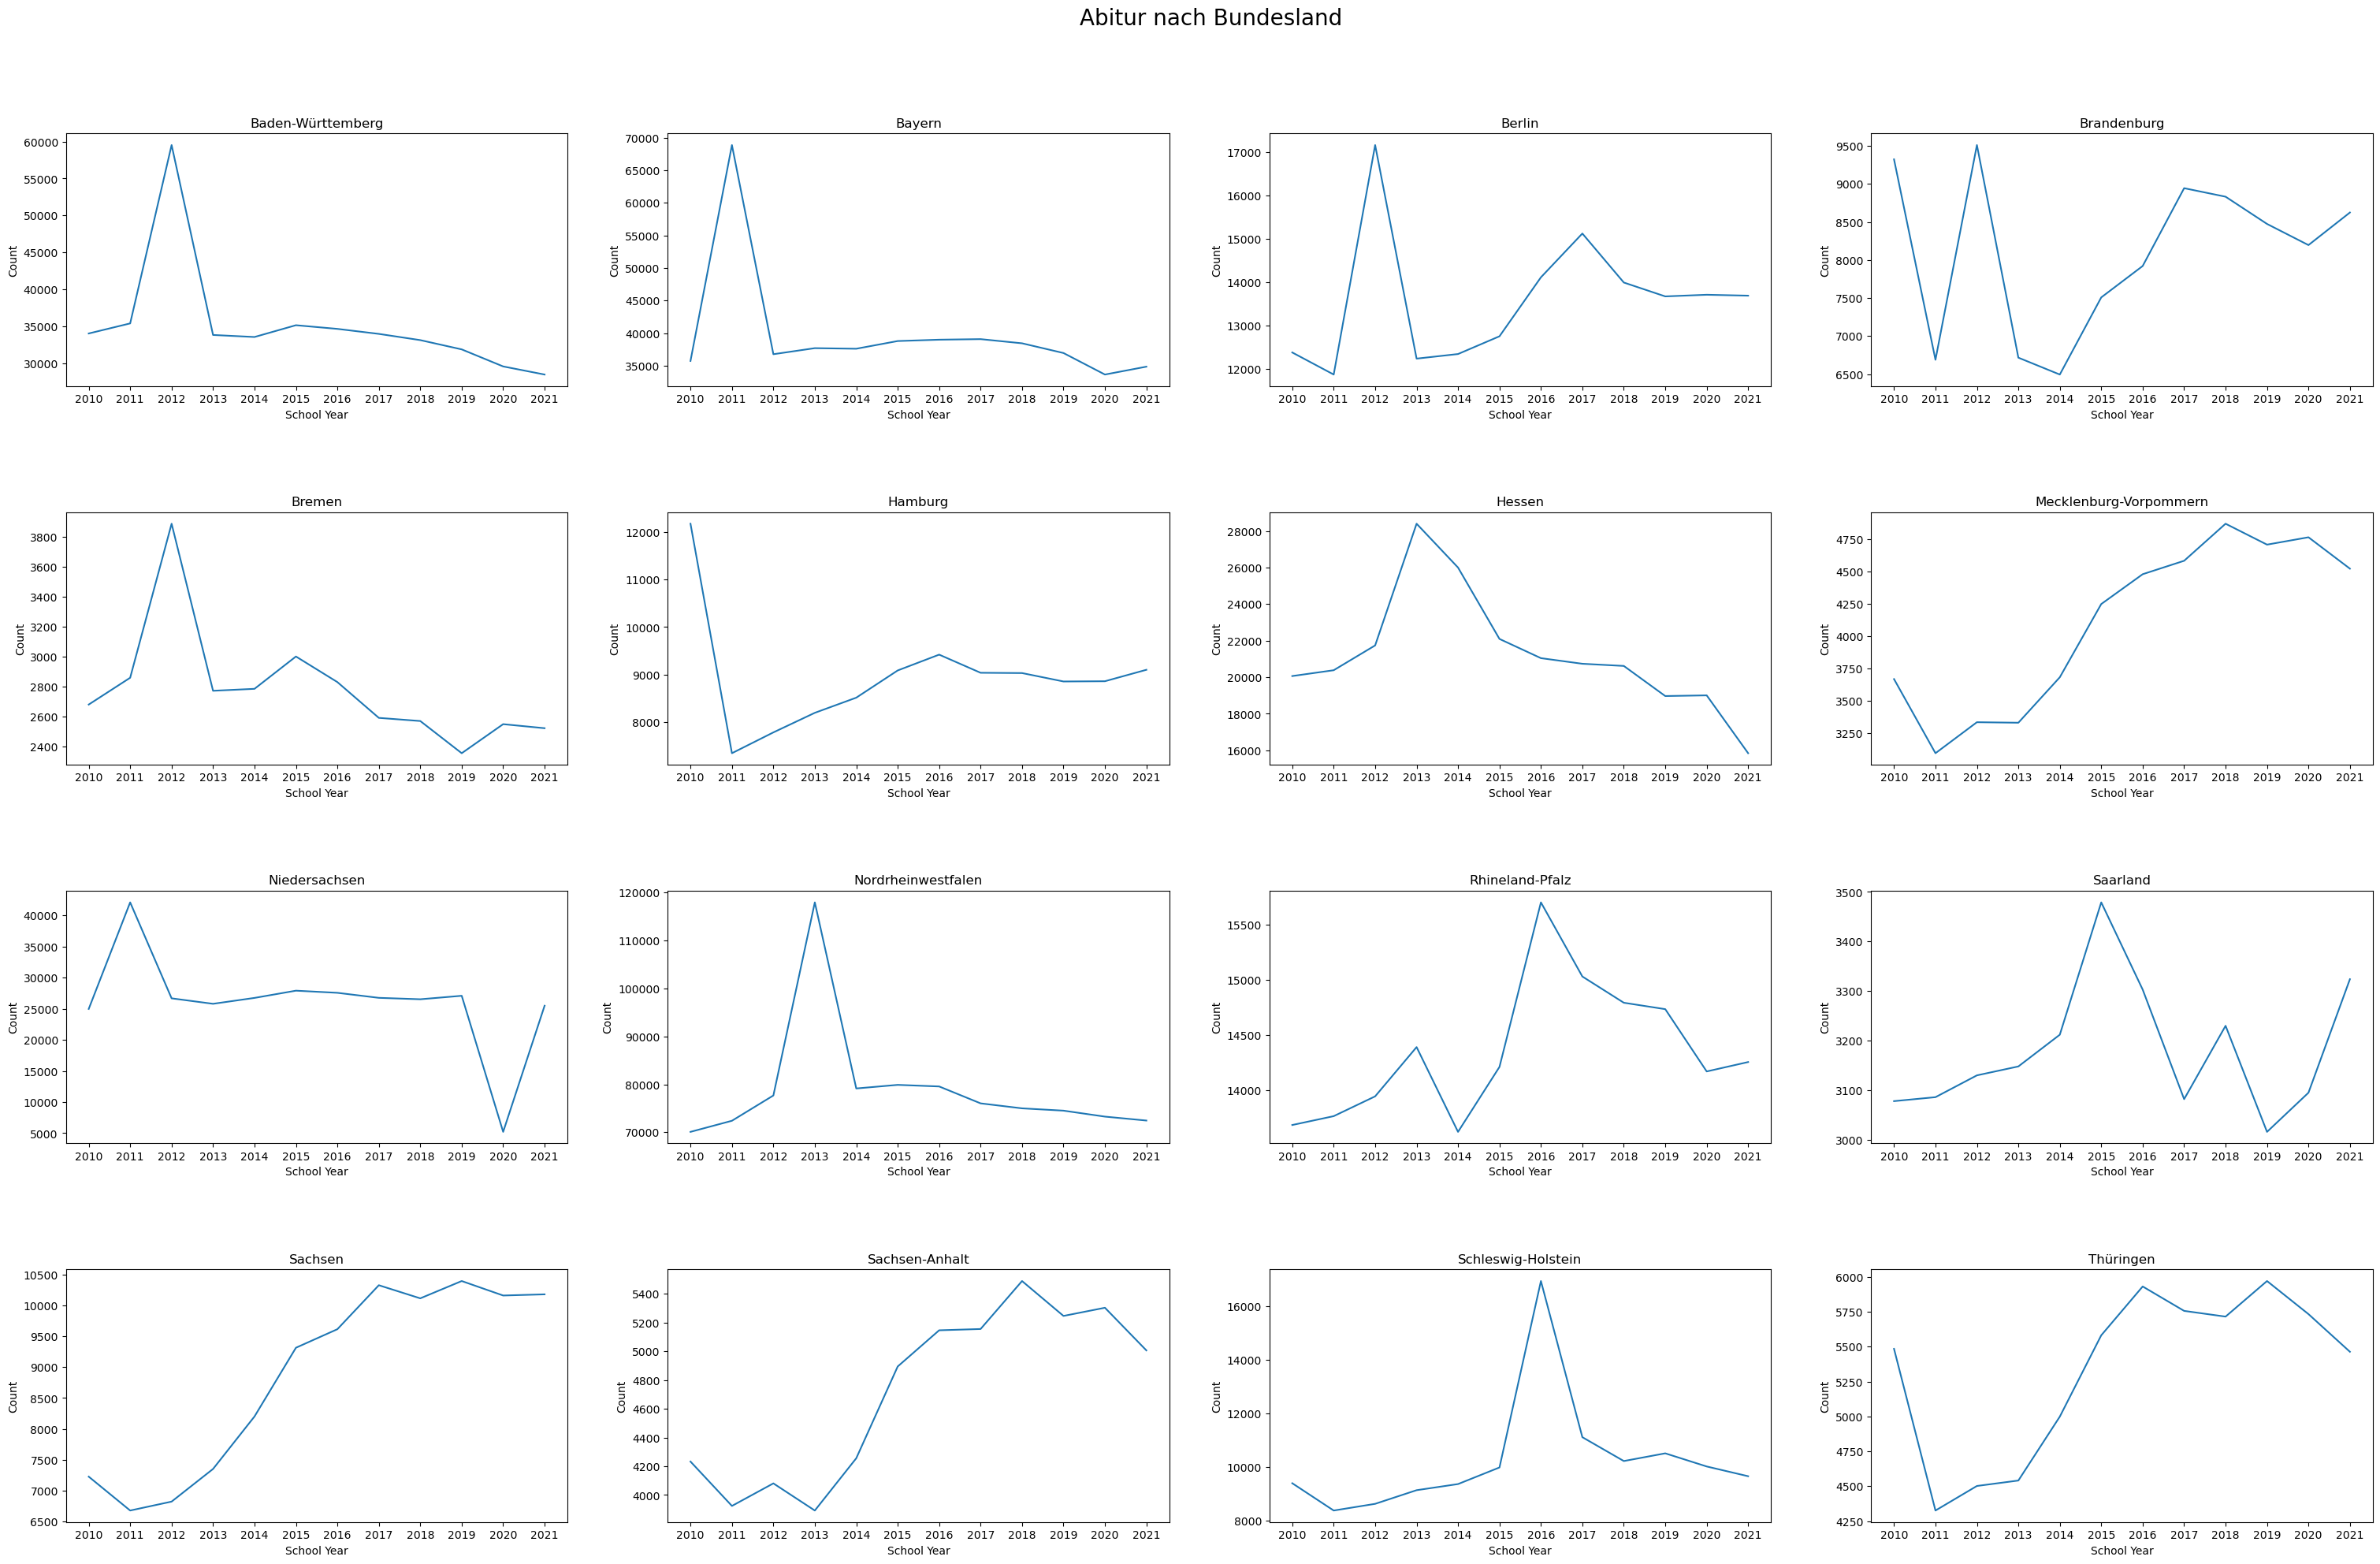

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(4, 4, figsize=(30,20)) # create subplots on 2 rows and 3 columns
plt.suptitle('Abitur nach Bundesland', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

datasets = [    {"state": "Baden-Württemberg", "data": bw_abitur},    
                {"state": "Bayern", "data": bay_abitur},    
                {"state": "Berlin", "data": ber_abitur},    
                {"state": "Brandenburg", "data": bra_abitur},    
                {"state": "Bremen", "data": bre_abitur},    
                {"state": "Hamburg", "data": hh_abitur},    
                {"state": "Hessen", "data": he_abitur},    
                {"state": "Mecklenburg-Vorpommern", "data": mvp_abitur},    
                {"state": "Niedersachsen", "data": ni_abitur},    
                {"state": "Nordrheinwestfalen", "data": nrw_abitur},    
                {"state": "Rhineland-Pfalz", "data": rp_abitur},    
                {"state": "Saarland", "data": saar_abitur},    
                {"state": "Sachsen", "data": sachs_abitur},    
                {"state": "Sachsen-Anhalt", "data": sachs_an_abitur},    
                {"state": "Schleswig-Holstein", "data": sh_abitur},    
                {"state": "Thüringen", "data": thue_abitur},]


for i, dataset in enumerate(datasets):
    row = i // 4
    col = i % 4
    
    axs[row, col].plot(dataset["data"])
    axs[row, col].set_title(dataset["state"])
    axs[row, col].set_xlabel("School Year")
    axs[row, col].set_ylabel("Count")
    axs[row, col].tick_params(axis='x', rotation=0)

plt.show()

## Berechnung der Gesamtzahl (Abitur) für Deutschland

In [ ]:
# Concatenate all 16 dataframes

df_abitur_merged = pd.concat([bw_abitur,bay_abitur,ber_abitur,bra_abitur,bre_abitur,hh_abitur,he_abitur,mvp_abitur,ni_abitur,nrw_abitur,rp_abitur,saar_abitur,sachs_abitur,sachs_an_abitur,sh_abitur,thue_abitur],axis=1)
df_abitur_merged.head(14)

,4,10,16,22,28,34,40,46,52,58,64,70,76,82,88,94
2010,34009,35719,12372,9324,2681,12176,20065,3667,24973,70102,13688,3078,7224,4233,9398,5485
2011,35374,68880,11863,6689,2860,7345,20384,3093,42105,72413,13768,3086,6674,3924,8382,4326
2012,59538,36755,17155,9512,3889,7783,21742,3333,26676,77679,13947,3130,6819,4081,8631,4502
2013,33808,37684,12230,6717,2773,8195,28404,3329,25797,117895,14392,3148,7349,3892,9139,4541
2014,33531,37596,12336,6495,2786,8514,26004,3681,26745,79141,13626,3212,8201,4256,9367,4999
2015,35128,38777,12745,7509,3002,9087,22097,4248,27909,79889,14213,3479,9317,4895,9985,5582
2016,34631,38985,14105,7922,2831,9420,21045,4479,27564,79560,15700,3303,9618,5147,16925,5932
2017,33953,39071,15115,8945,2592,9038,20738,4583,26756,76038,15030,3082,10332,5156,11112,5757
2018,33109,38431,13985,8833,2571,9032,20619,4870,26528,75001,14793,3230,10119,5490,10224,5716
2019,31853,36937,13665,8475,2356,8855,18971,4708,27087,74520,14735,3016,10400,5247,10511,5971


In [ ]:
# calculate new columns with sum

df_abitur_merged['BRD'] = df_abitur_merged[4] + df_abitur_merged[10] + df_abitur_merged[16] + df_abitur_merged[22] + df_abitur_merged[28] + df_abitur_merged[34] + df_abitur_merged[40] + df_abitur_merged[46] + df_abitur_merged[52] + df_abitur_merged[58] + df_abitur_merged[64] + df_abitur_merged[70] + df_abitur_merged[76] + df_abitur_merged[82] + df_abitur_merged[88] + df_abitur_merged[94]


In [ ]:
# Reducing dataframe to BRD-only

df_abitur_brd = df_abitur_merged['BRD']


## Visualizing BRD

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1737/3959122008.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


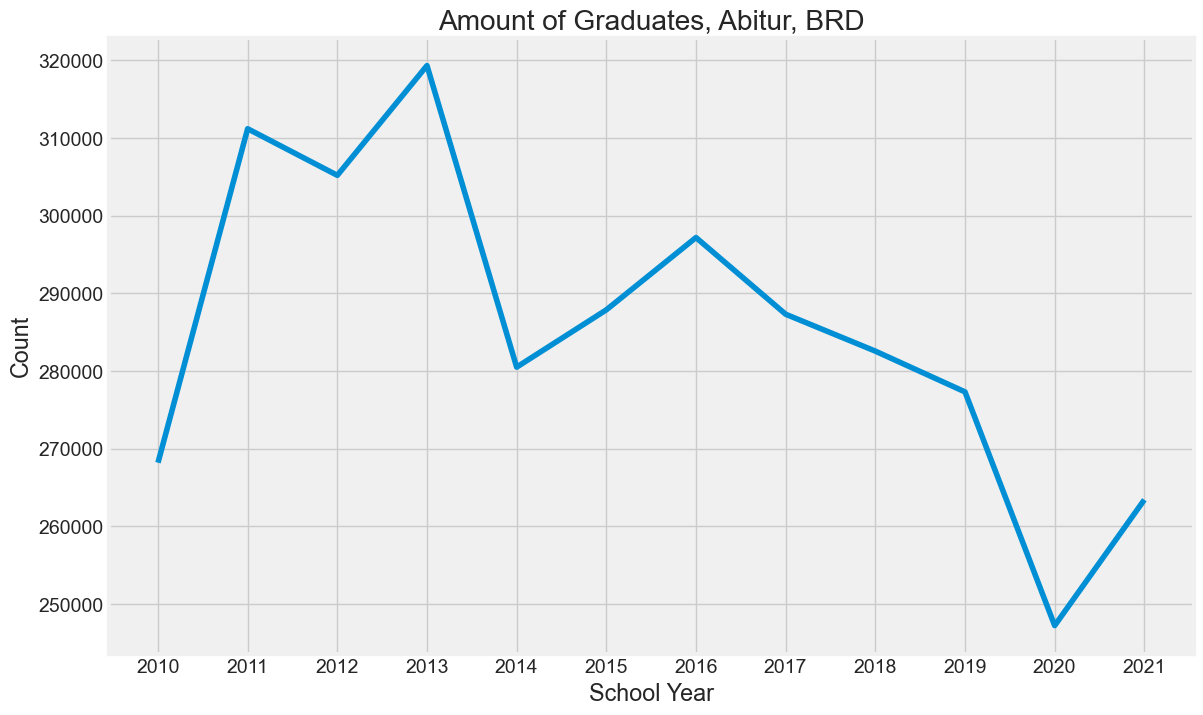

In [ ]:
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

plt.plot(df_abitur_brd)

plt.title("Amount of Graduates, Abitur, BRD")
plt.xlabel("School Year")
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=0)
plt.show()

## Dropouts nach Bundesländern

In [ ]:
# Dropouts nach BL

bw_dropouts = df_insgesamt.iloc[0,2:14]
bay_dropouts = df_insgesamt.iloc[6, 2:14]
ber_dropouts = df_insgesamt.iloc[12, 2:14]
bra_dropouts = df_insgesamt.iloc[18, 2:14]
bre_dropouts = df_insgesamt.iloc[24, 2:14]
hh_dropouts = df_insgesamt.iloc[30, 2:14]
he_dropouts = df_insgesamt.iloc[36, 2:14]
mvp_dropouts = df_insgesamt.iloc[42, 2:14]
ni_dropouts = df_insgesamt.iloc[48, 2:14]
nrw_dropouts = df_insgesamt.iloc[54, 2:14]
rp_dropouts = df_insgesamt.iloc[60, 2:14]
saar_dropouts = df_insgesamt.iloc[66, 2:14]
sachs_dropouts = df_insgesamt.iloc[72, 2:14]
sachs_an_dropouts = df_insgesamt.iloc[78, 2:14]
sh_dropouts = df_insgesamt.iloc[84, 2:14]
thue_dropouts = df_insgesamt.iloc[90, 2:14]

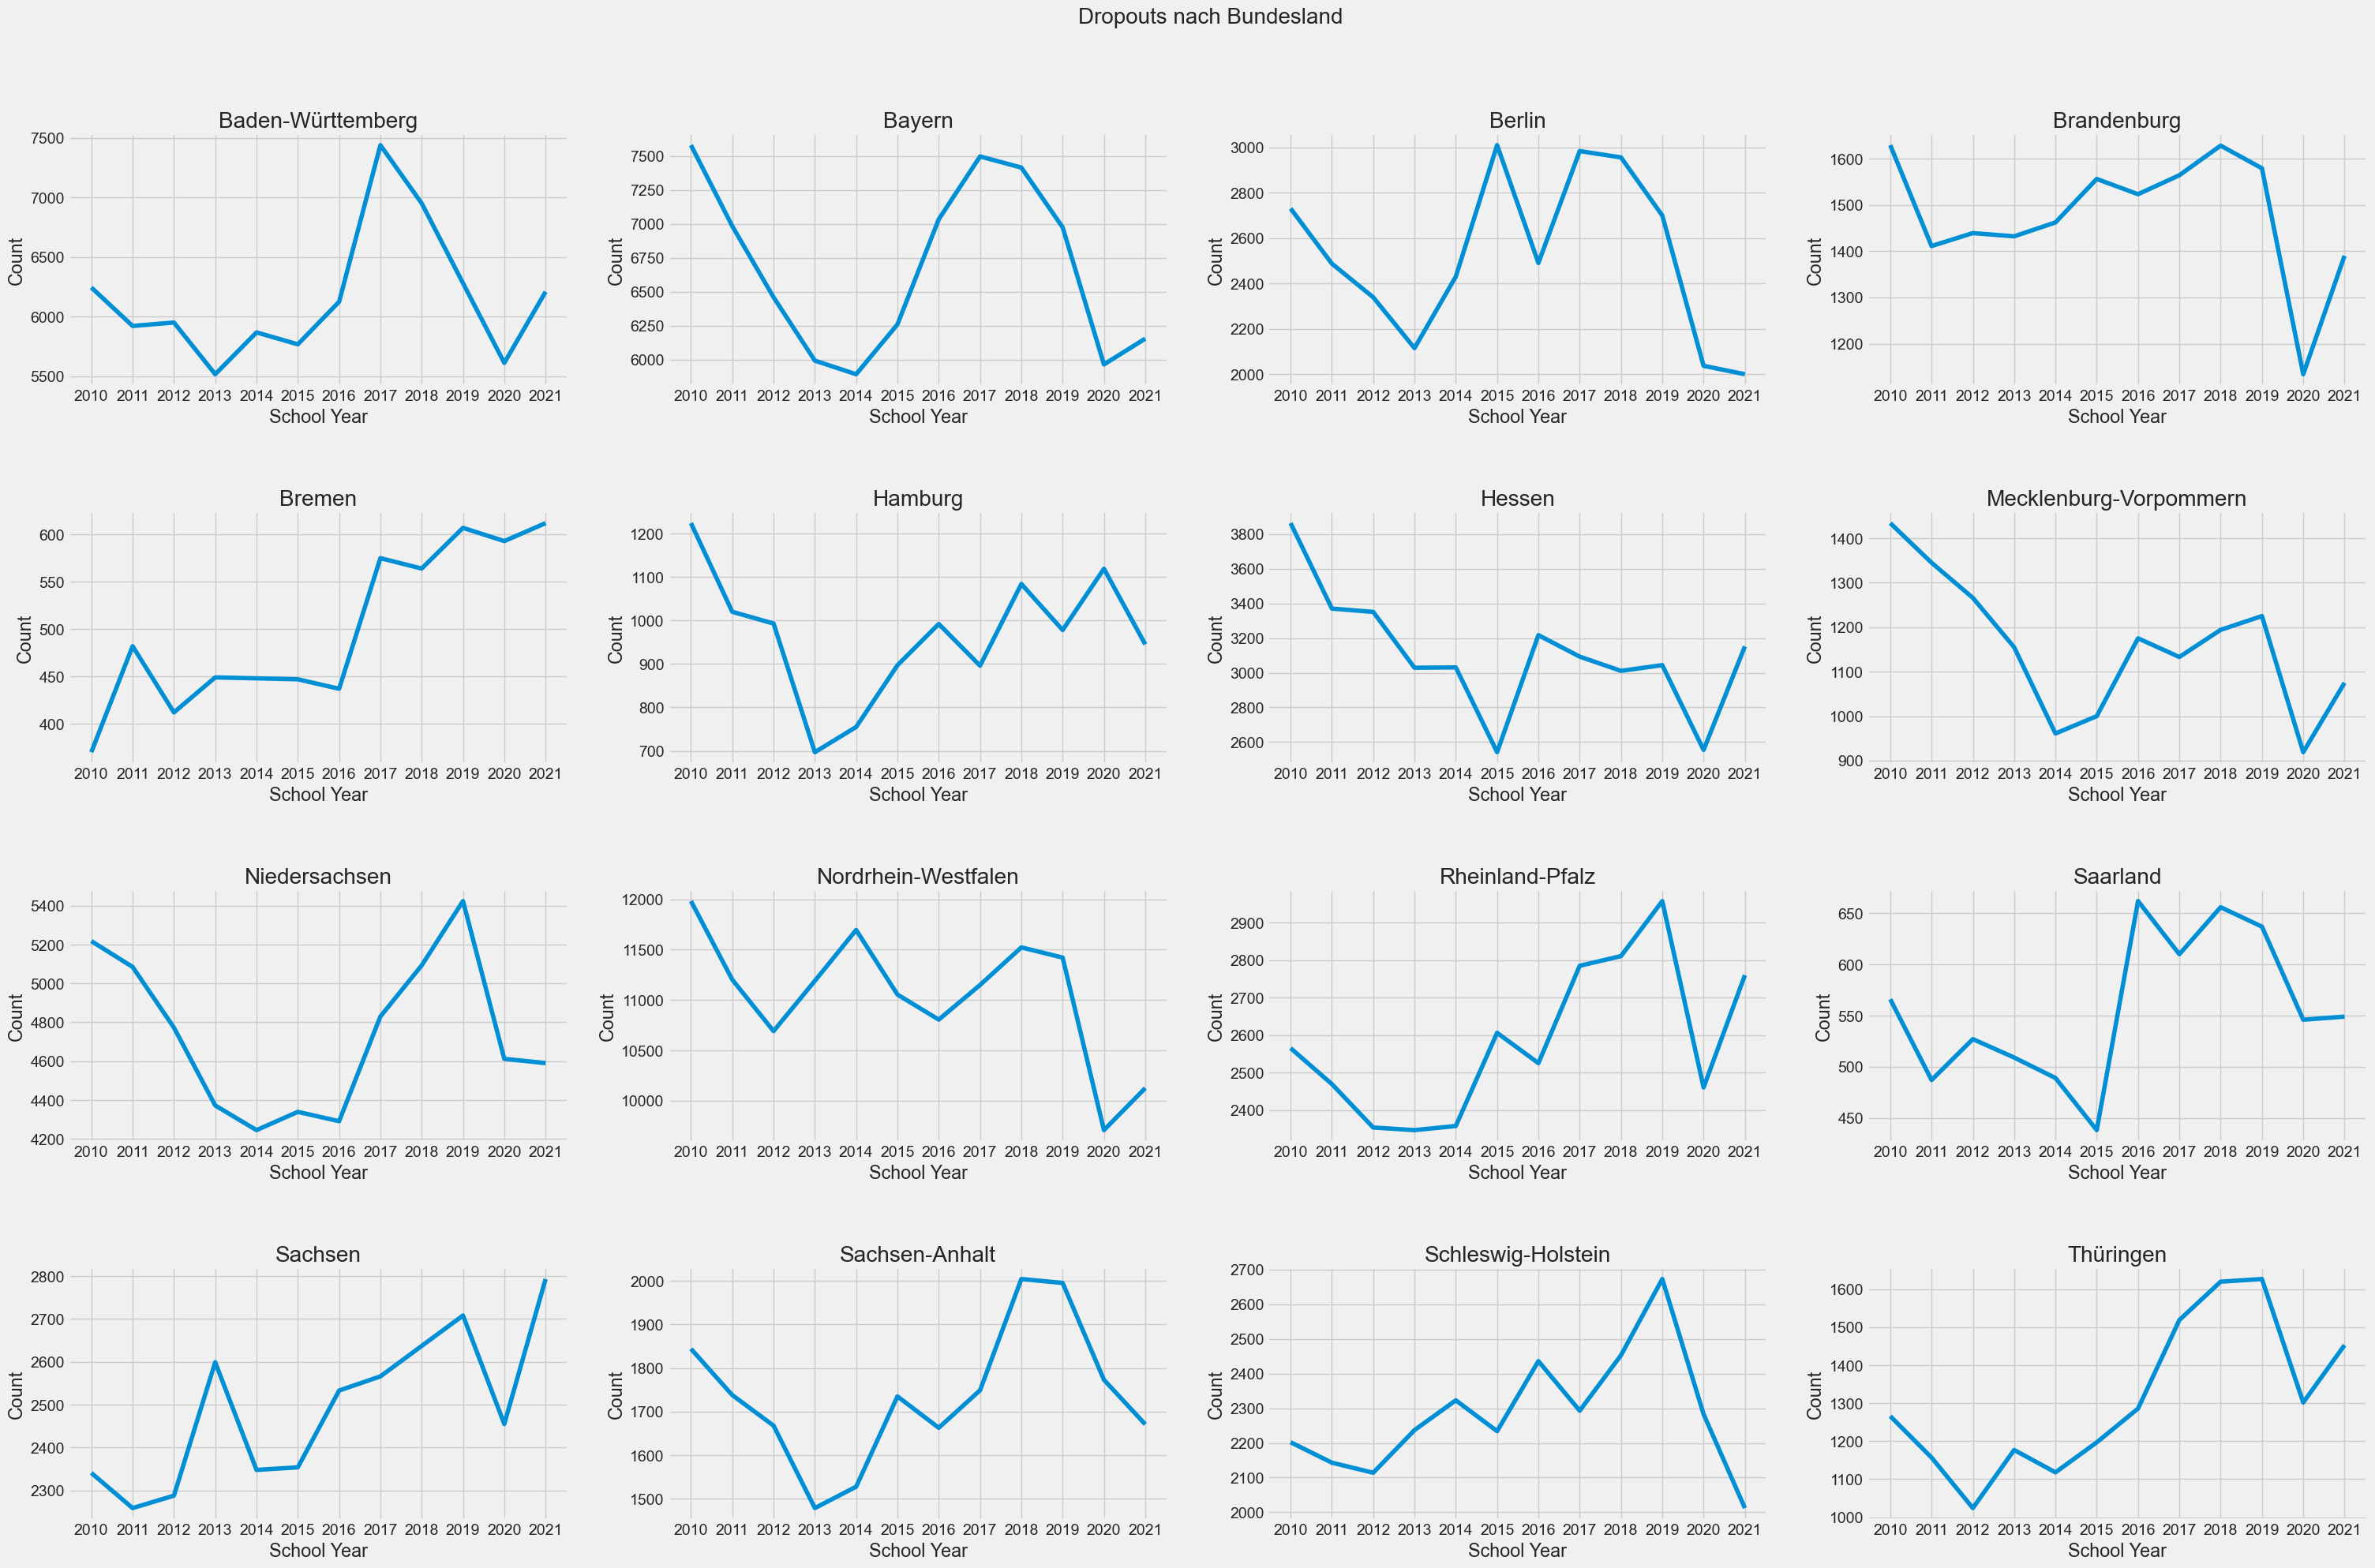

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(30,20)) # create subplots on 2 rows and 3 columns
plt.suptitle('Dropouts nach Bundesland', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

datasets = [    {"state": "Baden-Württemberg", "data": bw_dropouts},    
                {"state": "Bayern", "data": bay_dropouts},    
                {"state": "Berlin", "data": ber_dropouts},    
                {"state": "Brandenburg", "data": bra_dropouts},    
                {"state": "Bremen", "data": bre_dropouts},    
                {"state": "Hamburg", "data": hh_dropouts},    
                {"state": "Hessen", "data": he_dropouts},    
                {"state": "Mecklenburg-Vorpommern", "data": mvp_dropouts},    
                {"state": "Niedersachsen", "data": ni_dropouts},    
                {"state": "Nordrhein-Westfalen", "data": nrw_dropouts},    
                {"state": "Rheinland-Pfalz", "data": rp_dropouts},    
                {"state": "Saarland", "data": saar_dropouts},    
                {"state": "Sachsen", "data": sachs_dropouts},    
                {"state": "Sachsen-Anhalt", "data": sachs_an_dropouts},    
                {"state": "Schleswig-Holstein", "data": sh_dropouts},    
                {"state": "Thüringen", "data": thue_dropouts},]


for i, dataset in enumerate(datasets):
    row = i // 4
    col = i % 4
    
    axs[row, col].plot(dataset["data"])
    axs[row, col].set_title(dataset["state"])
    axs[row, col].set_xlabel("School Year")
    axs[row, col].set_ylabel("Count")
    axs[row, col].tick_params(axis='x', rotation=0)

plt.show()

## Berechnung der Gesamtzahl (Dropouts) für Deutschland

In [ ]:
# Concatenate all 16 dataframes

df_dropouts_merged = pd.concat([bw_dropouts,bay_dropouts,ber_dropouts,bra_dropouts,bre_dropouts,hh_dropouts,he_dropouts,mvp_dropouts,ni_dropouts,nrw_dropouts,rp_dropouts,saar_dropouts,sachs_dropouts,sachs_an_dropouts,sh_dropouts,thue_dropouts],axis=1)
df_dropouts_merged.head(13)

,0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90
2010,6245,7579,2730,1629,370,1224,3863,1434,5218,11982,2565,566,2341,1844,2202,1266
2011,5922,6983,2487,1411,482,1020,3370,1345,5085,11202,2469,487,2259,1738,2143,1157
2012,5951,6459,2339,1439,412,993,3351,1266,4773,10691,2353,527,2288,1668,2114,1024
2013,5517,5992,2115,1432,449,697,3029,1155,4372,11190,2346,509,2599,1479,2237,1177
2014,5868,5892,2430,1462,448,755,3031,961,4245,11695,2357,489,2348,1528,2323,1118
2015,5768,6259,3009,1556,447,897,2542,1000,4339,11054,2606,438,2354,1735,2234,1197
2016,6125,7033,2490,1523,437,992,3217,1175,4291,10805,2525,662,2533,1663,2436,1286
2017,7439,7496,2983,1564,575,896,3093,1133,4830,11149,2785,610,2566,1749,2293,1519
2018,6951,7414,2955,1628,564,1084,3011,1194,5093,11522,2811,656,2637,2004,2453,1620
2019,6281,6974,2699,1579,607,978,3044,1225,5424,11421,2958,637,2708,1995,2673,1627


In [ ]:
# calculate new columns with sum

df_dropouts_merged['BRD'] = df_dropouts_merged[0] + df_dropouts_merged[6] + df_dropouts_merged[12] + df_dropouts_merged[18] + df_dropouts_merged[24] + df_dropouts_merged[30] + df_dropouts_merged[36] + df_dropouts_merged[42] + df_dropouts_merged[48] + df_dropouts_merged[54] + df_dropouts_merged[60] + df_dropouts_merged[66] + df_dropouts_merged[72] + df_dropouts_merged[78] + df_dropouts_merged[84] + df_dropouts_merged[90]
df_dropouts_merged.head(14)

,0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90,BRD
2010,6245,7579,2730,1629,370,1224,3863,1434,5218,11982,2565,566,2341,1844,2202,1266,53058
2011,5922,6983,2487,1411,482,1020,3370,1345,5085,11202,2469,487,2259,1738,2143,1157,49560
2012,5951,6459,2339,1439,412,993,3351,1266,4773,10691,2353,527,2288,1668,2114,1024,47648
2013,5517,5992,2115,1432,449,697,3029,1155,4372,11190,2346,509,2599,1479,2237,1177,46295
2014,5868,5892,2430,1462,448,755,3031,961,4245,11695,2357,489,2348,1528,2323,1118,46950
2015,5768,6259,3009,1556,447,897,2542,1000,4339,11054,2606,438,2354,1735,2234,1197,47435
2016,6125,7033,2490,1523,437,992,3217,1175,4291,10805,2525,662,2533,1663,2436,1286,49193
2017,7439,7496,2983,1564,575,896,3093,1133,4830,11149,2785,610,2566,1749,2293,1519,52680
2018,6951,7414,2955,1628,564,1084,3011,1194,5093,11522,2811,656,2637,2004,2453,1620,53597
2019,6281,6974,2699,1579,607,978,3044,1225,5424,11421,2958,637,2708,1995,2673,1627,52830


In [ ]:
# save to csv
# df_dropouts_merged.to_csv('./Tableau/dropouts_brd.csv', index=True)

In [ ]:
# Reducing dataframe to BRD-only

df_dropouts_brd = df_dropouts_merged['BRD']
df_dropouts_brd.

SyntaxError: invalid syntax (1073748772.py, line 4)

## Visualizing BRD

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1033/3221599978.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


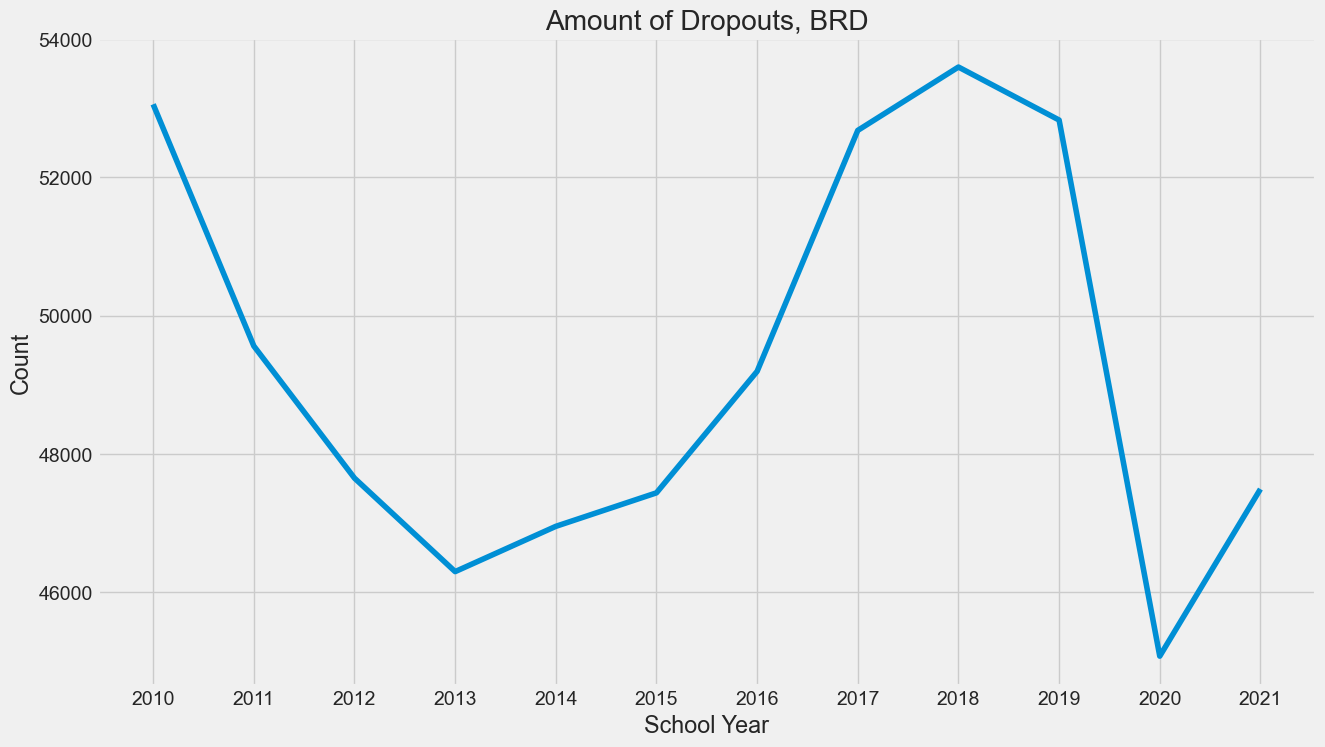

In [ ]:
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

plt.plot(df_dropouts_brd)

plt.title("Amount of Dropouts, BRD")
plt.xlabel("School Year")
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=0)
plt.show()

# Gesamtschülerzahl nach Bundesländern

In [ ]:
bw_gesamt = df_insgesamt.iloc[5,2:14]
bay_gesamt = df_insgesamt.iloc[11, 2:14]
ber_gesamt = df_insgesamt.iloc[17, 2:14]
bra_gesamt = df_insgesamt.iloc[23, 2:14]
bre_gesamt = df_insgesamt.iloc[29, 2:14]
hh_gesamt = df_insgesamt.iloc[35, 2:14]
he_gesamt = df_insgesamt.iloc[41, 2:14]
mvp_gesamt = df_insgesamt.iloc[47, 2:14]
ni_gesamt = df_insgesamt.iloc[53, 2:14]
nrw_gesamt = df_insgesamt.iloc[59, 2:14]
rp_gesamt = df_insgesamt.iloc[65, 2:14]
saar_gesamt = df_insgesamt.iloc[71, 2:14]
sachs_gesamt = df_insgesamt.iloc[77, 2:14]
sachs_an_gesamt = df_insgesamt.iloc[83, 2:14]
sh_gesamt = df_insgesamt.iloc[89, 2:14]
thue_gesamt = df_insgesamt.iloc[95, 2:14]

In [ ]:
bw_gesamt.head(13)

2010    122716
2011    121645
2012    139828
2013    120845
2014    119596
2015    120736
2016    119106
2017    113215
2018    108505
2019    106380
2020    103660
2021     99696
Name: 5, dtype: object

### Relative Häufigkeit Abitur nach Bundesländern

In [ ]:
bw_abitur_relativ = pd.concat([bw_abitur,bw_gesamt],axis=1)

bay_abitur_relativ = pd.concat([bay_abitur,bay_gesamt],axis=1)
ber_abitur_relativ = pd.concat([ber_abitur,ber_gesamt],axis=1)
bra_abitur_relativ = pd.concat([bra_abitur,bra_gesamt],axis=1)
bre_abitur_relativ = pd.concat([bre_abitur,bre_gesamt],axis=1)
hh_abitur_relativ = pd.concat([hh_abitur,hh_gesamt],axis=1)
he_abitur_relativ = pd.concat([he_abitur,he_gesamt],axis=1)
mvp_abitur_relativ = pd.concat([mvp_abitur,mvp_gesamt],axis=1)
ni_abitur_relativ = pd.concat([ni_abitur,ni_gesamt],axis=1)
nrw_abitur_relativ = pd.concat([nrw_abitur,nrw_gesamt],axis=1)
rp_abitur_relativ = pd.concat([rp_abitur,rp_gesamt],axis=1)
saar_abitur_relativ = pd.concat([saar_abitur,saar_gesamt],axis=1)
sachs_abitur_relativ = pd.concat([sachs_abitur,sachs_gesamt],axis=1)
sachs_an_abitur_relativ = pd.concat([sachs_an_abitur,sachs_an_gesamt],axis=1)
sh_abitur_relativ = pd.concat([sh_abitur,sh_gesamt],axis=1)
thue_abitur_relativ = pd.concat([thue_abitur,thue_gesamt],axis=1)

# Fehleranalyse: Stimmen die Zahlen für die Abschlüsse mit denen auf dem Noten-Datensatz überein?

In [ ]:
df_abitur_relativ_merged_test = pd.concat([bw_abitur_relativ,
                                      bay_abitur_relativ,
                                      ber_abitur_relativ,bra_abitur_relativ,bre_abitur_relativ,hh_abitur_relativ,he_abitur_relativ,mvp_abitur_relativ,ni_abitur_relativ,nrw_abitur_relativ,rp_abitur_relativ,saar_abitur_relativ,sachs_abitur_relativ,sachs_an_abitur_relativ,sh_abitur_relativ,thue_abitur_relativ],axis=1)
#df_abitur_relativ_merged_test.head(14)
#df_abitur_relativ_merged_test.columns
df_test_test = df_abitur_relativ_merged_test[[4, 10, 16, 22, 28, 34, 40, 46, 52, 58, 64, 70, 76, 82, 88, 94]]
df_test_test.rename(columns={4: 'Baden_W', 10: 'Bayern', 16: 'Berlin'
                             , 22: 'Brandenburg', 28: 'Bremen', 34: 'Hamburg'
                             , 40: 'Hessen', 46: 'Mecklenburg_V', 52: 'Niedersachsen'
                             , 58: 'Nordrhein_W', 64: 'Rheinland_P'
                             , 70: 'Saarland', 76 :'Sachsen', 82: 'Sachsen_A', 88: 'Schleswig_H', 94: 'Thüringen'}, inplace=True)


/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1033/4154789772.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_test.rename(columns={4: 'Baden_W', 10: 'Bayern', 16: 'Berlin'


In [ ]:
df_test_test.iloc[10:11].head(14)

,Baden_W,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg_V,Niedersachsen,Nordrhein_W,Rheinland_P,Saarland,Sachsen,Sachsen_A,Schleswig_H,Thüringen
2020,29543,33632,13703,8197,2550,8860,19008,4765,5208,73278,14172,3095,10165,5304,10022,5734


## Überprüfung Ende

In [ ]:
# Neue Spalte mit Prozent

bw_abitur_relativ['bw_Relation'] = bw_abitur_relativ[4] / bw_abitur_relativ[5] * 100
bay_abitur_relativ['bay_Relation'] = bay_abitur_relativ[10] / bay_abitur_relativ[11] * 100
ber_abitur_relativ['ber_Relation'] = ber_abitur_relativ[16] / ber_abitur_relativ[17] * 100
bra_abitur_relativ['bra_Relation'] = bra_abitur_relativ[22] / bra_abitur_relativ[23] * 100
bre_abitur_relativ['bre_Relation'] = bre_abitur_relativ[28] / bre_abitur_relativ[29] * 100
hh_abitur_relativ['hh_Relation'] = hh_abitur_relativ[34] / hh_abitur_relativ[35] * 100
he_abitur_relativ['he_Relation'] = he_abitur_relativ[40] / he_abitur_relativ[41] * 100
mvp_abitur_relativ['mvp_Relation'] = mvp_abitur_relativ[46] / mvp_abitur_relativ[47] * 100
ni_abitur_relativ['ni_Relation'] = ni_abitur_relativ[52] / ni_abitur_relativ[53] * 100
nrw_abitur_relativ['nrw_Relation'] = nrw_abitur_relativ[58] / nrw_abitur_relativ[59] * 100
rp_abitur_relativ['rp_Relation'] = rp_abitur_relativ[64] / rp_abitur_relativ[65] * 100
saar_abitur_relativ['saar_Relation'] = saar_abitur_relativ[70] / saar_abitur_relativ[71] * 100
sachs_abitur_relativ['sachs_Relation'] = sachs_abitur_relativ[76] / sachs_abitur_relativ[77] * 100
sachs_an_abitur_relativ['sachs_an_Relation'] = sachs_an_abitur_relativ[82] / sachs_an_abitur_relativ[83] * 100
sh_abitur_relativ['sh_Relation'] = sh_abitur_relativ[88] / sh_abitur_relativ[89] * 100
thue_abitur_relativ['thue_Relation'] = thue_abitur_relativ[94] / thue_abitur_relativ[95] * 100



In [ ]:
# Reducing dataframe to Relativ-only

bw_abitur_relativ_only = bw_abitur_relativ['bw_Relation']
bay_abitur_relativ_only = bay_abitur_relativ['bay_Relation']
ber_abitur_relativ_only = ber_abitur_relativ['ber_Relation']
bra_abitur_relativ_only = bra_abitur_relativ['bra_Relation']
bre_abitur_relativ_only = bre_abitur_relativ['bre_Relation']
hh_abitur_relativ_only = hh_abitur_relativ['hh_Relation']
he_abitur_relativ_only = he_abitur_relativ['he_Relation']
mvp_abitur_relativ_only = mvp_abitur_relativ['mvp_Relation']
ni_abitur_relativ_only = ni_abitur_relativ['ni_Relation']
nrw_abitur_relativ_only = nrw_abitur_relativ['nrw_Relation']
rp_abitur_relativ_only = rp_abitur_relativ['rp_Relation']
saar_abitur_relativ_only = saar_abitur_relativ['saar_Relation']
sachs_abitur_relativ_only = sachs_abitur_relativ['sachs_Relation']
sachs_an_abitur_relativ_only = sachs_an_abitur_relativ['sachs_an_Relation']
sh_abitur_relativ_only = sh_abitur_relativ['sh_Relation']
thue_abitur_relativ_only = thue_abitur_relativ['thue_Relation']



In [ ]:
# zusammenfügen

df_abitur_relativ_merged = pd.concat([bw_abitur_relativ_only,
                                      bay_abitur_relativ_only,
                                      ber_abitur_relativ_only,bra_abitur_relativ_only,bre_abitur_relativ_only,hh_abitur_relativ_only,he_abitur_relativ_only,mvp_abitur_relativ_only,ni_abitur_relativ_only,nrw_abitur_relativ_only,rp_abitur_relativ_only,saar_abitur_relativ_only,sachs_abitur_relativ_only,sachs_an_abitur_relativ_only,sh_abitur_relativ_only,thue_abitur_relativ_only],axis=1)
df_abitur_relativ_merged.head(14)

,bw_Relation,bay_Relation,ber_Relation,bra_Relation,bre_Relation,hh_Relation,he_Relation,mvp_Relation,ni_Relation,nrw_Relation,rp_Relation,saar_Relation,sachs_Relation,sachs_an_Relation,sh_Relation,thue_Relation
2010,27.713583,25.74565,39.805669,46.540881,34.881603,59.012262,29.482206,33.80035,28.590891,32.434208,30.450258,30.697118,29.905614,26.865956,29.235364,36.561792
2011,29.079699,40.469797,40.074995,40.502573,36.024688,50.606311,30.898893,32.363712,40.970127,34.649524,31.005517,31.541292,29.083145,26.827101,27.903725,32.259508
2012,42.579455,26.651633,48.668047,46.815631,44.314038,51.769323,32.719338,32.156295,30.508823,36.739298,31.38742,31.403632,28.755166,27.319588,29.455327,33.017968
2013,27.976333,27.476486,40.230263,37.277318,36.419753,57.894737,38.180498,31.545532,29.833813,46.189861,32.082748,31.054553,28.203554,26.668494,30.489758,30.529784
2014,28.036891,27.512825,41.102189,35.682892,36.979028,54.615434,36.947997,33.285107,30.633984,37.492835,31.139449,33.045267,29.405859,27.035955,30.93461,31.396809
2015,29.094885,28.437851,40.666879,36.010934,38.193384,54.711301,35.260983,35.36758,32.525698,38.573967,32.982155,36.838204,32.278963,29.017725,33.137528,33.695521
2016,29.075781,27.815434,45.451616,37.71483,40.48913,55.594901,32.276617,35.652312,32.749955,39.181888,36.316532,34.579146,31.410843,29.164778,45.502205,34.599008
2017,29.989842,28.71242,46.580788,41.87146,37.081545,52.712003,32.521524,35.76836,32.449215,38.551981,35.64906,33.44184,32.839616,29.337127,36.514196,32.989513
2018,30.513801,28.638603,45.26769,40.693817,35.97817,52.344248,33.265573,35.97016,32.722742,39.64154,35.413674,34.877443,32.920164,30.348259,34.937124,32.560524
2019,29.942658,28.457953,43.635841,40.080397,36.035485,53.423831,31.598847,35.247436,33.78316,39.396054,36.57689,34.056007,32.780685,28.942578,36.152576,32.690939


### Speichern als CSV

In [ ]:
# df_abitur_relativ_merged.to_csv("abitur_graduates_percentage_all_states", encoding='utf-8')

## Visualisierung

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1033/3651114455.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


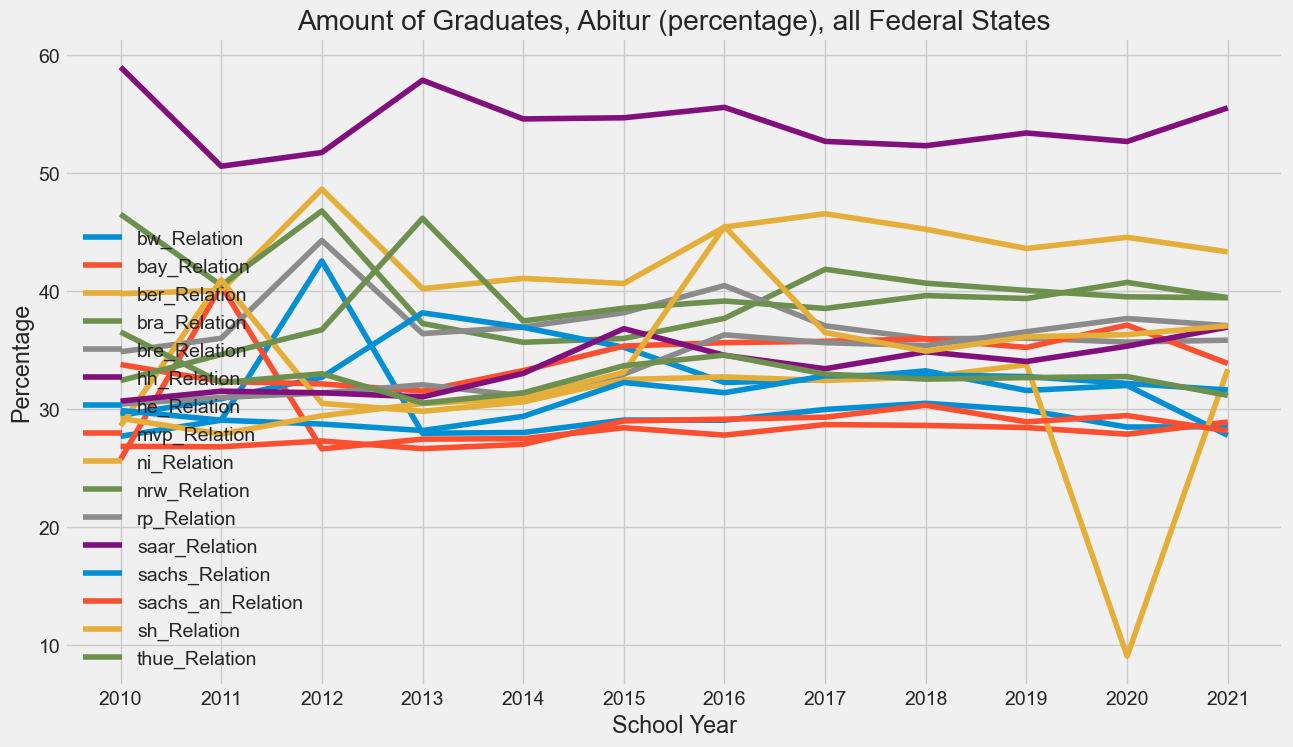

In [ ]:
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

plt.plot(df_abitur_relativ_merged)

plt.title("Amount of Graduates, Abitur (percentage), all Federal States")
plt.legend(df_abitur_relativ_merged)
plt.xlabel("School Year")
plt.ylabel('Percentage')
plt.tick_params(axis='x', rotation=0)
plt.show()

Which Bundesland is the best to go to school?

- According to the above graph, Hamburg has by far the highest percentage of A-level Graduates compared to the overall number of students.

## Nochmal jedes Bundesland einzeln geplottet.

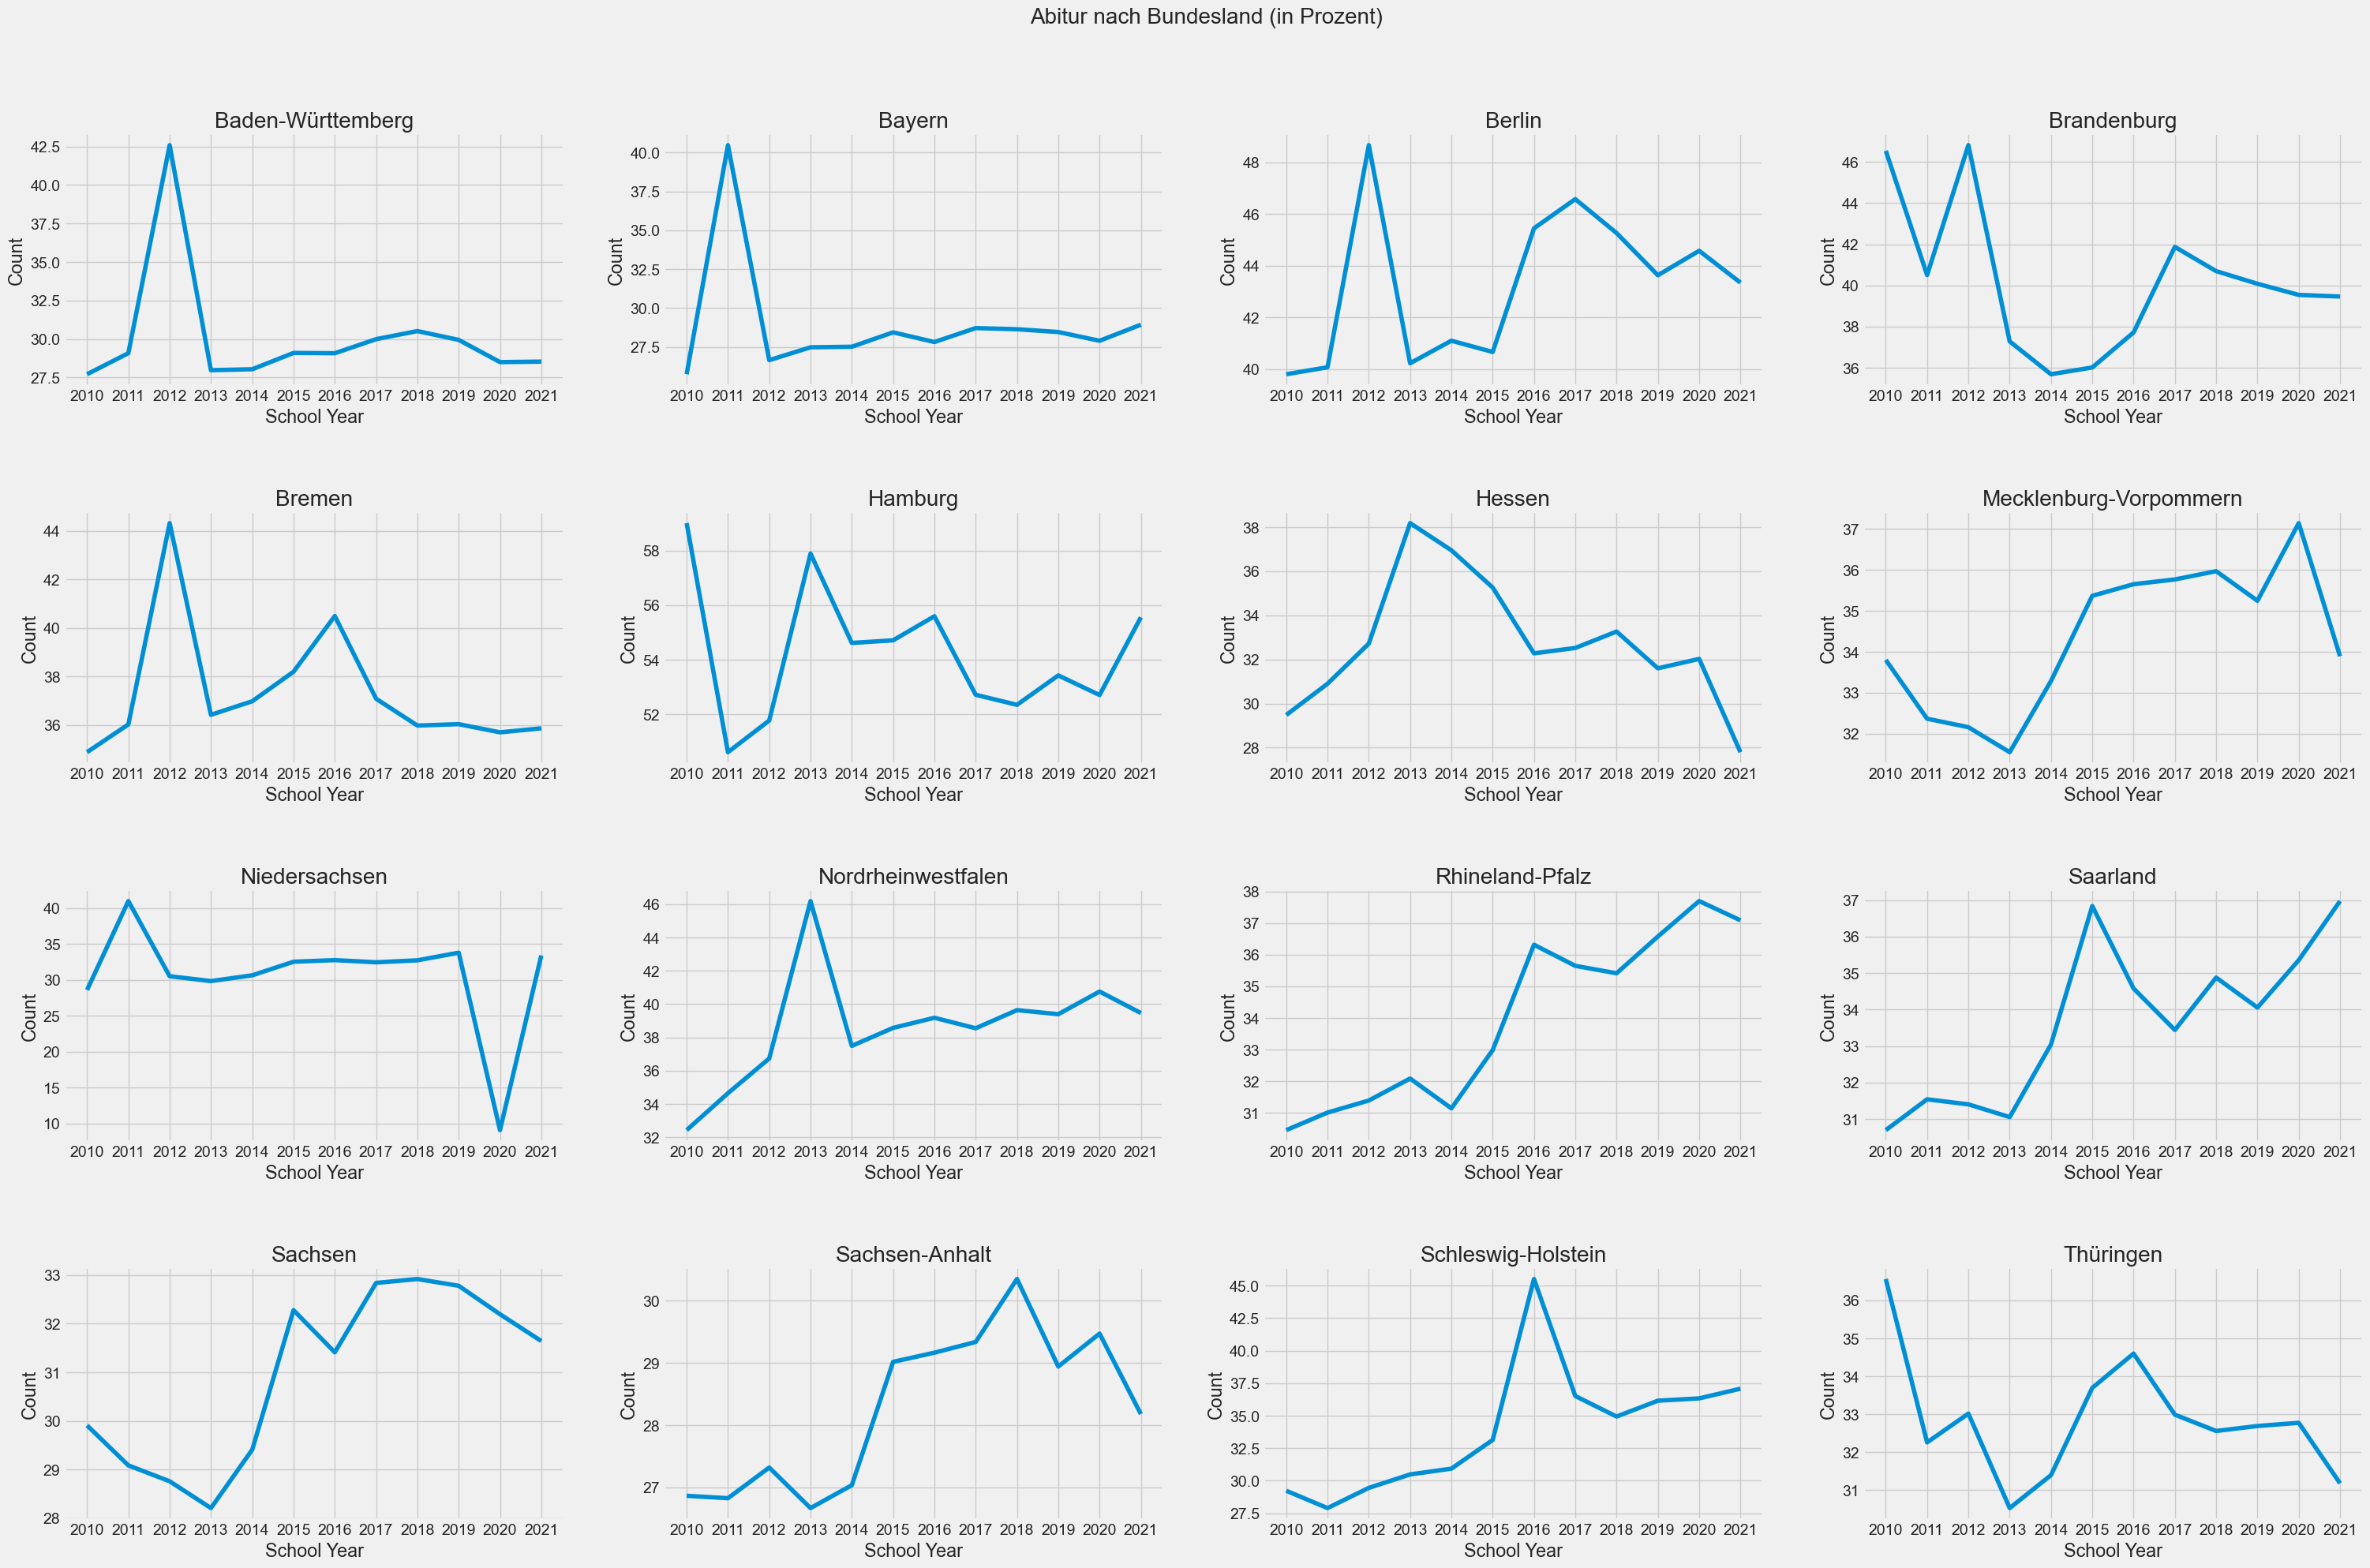

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(30,20)) # create subplots on 2 rows and 3 columns
plt.suptitle('Abitur nach Bundesland (in Prozent)', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

datasets = [    {"state": "Baden-Württemberg", "data": bw_abitur_relativ_only},    
                {"state": "Bayern", "data": bay_abitur_relativ_only},    
                {"state": "Berlin", "data": ber_abitur_relativ_only},    
                {"state": "Brandenburg", "data": bra_abitur_relativ_only},    
                {"state": "Bremen", "data": bre_abitur_relativ_only},    
                {"state": "Hamburg", "data": hh_abitur_relativ_only},    
                {"state": "Hessen", "data": he_abitur_relativ_only},    
                {"state": "Mecklenburg-Vorpommern", "data": mvp_abitur_relativ_only},    
                {"state": "Niedersachsen", "data": ni_abitur_relativ_only},    
                {"state": "Nordrheinwestfalen", "data": nrw_abitur_relativ_only},    
                {"state": "Rhineland-Pfalz", "data": rp_abitur_relativ_only},    
                {"state": "Saarland", "data": saar_abitur_relativ_only},    
                {"state": "Sachsen", "data": sachs_abitur_relativ_only},    
                {"state": "Sachsen-Anhalt", "data": sachs_an_abitur_relativ_only},    
                {"state": "Schleswig-Holstein", "data": sh_abitur_relativ_only},    
                {"state": "Thüringen", "data": thue_abitur_relativ_only},]


for i, dataset in enumerate(datasets):
    row = i // 4
    col = i % 4
    
    axs[row, col].plot(dataset["data"])
    axs[row, col].set_title(dataset["state"])
    axs[row, col].set_xlabel("School Year")
    axs[row, col].set_ylabel("Count")
    axs[row, col].tick_params(axis='x', rotation=0)

plt.show()

### Relative Häufigkeit Dropouts nach Bundesländern

In [ ]:
bw_dropouts_relativ = pd.concat([bw_dropouts,bw_gesamt],axis=1)

bay_dropouts_relativ = pd.concat([bay_dropouts,bay_gesamt],axis=1)
ber_dropouts_relativ = pd.concat([ber_dropouts,ber_gesamt],axis=1)
bra_dropouts_relativ = pd.concat([bra_dropouts,bra_gesamt],axis=1)
bre_dropouts_relativ = pd.concat([bre_dropouts,bre_gesamt],axis=1)
hh_dropouts_relativ = pd.concat([hh_dropouts,hh_gesamt],axis=1)
he_dropouts_relativ = pd.concat([he_dropouts,he_gesamt],axis=1)
mvp_dropouts_relativ = pd.concat([mvp_dropouts,mvp_gesamt],axis=1)
ni_dropouts_relativ = pd.concat([ni_dropouts,ni_gesamt],axis=1)
nrw_dropouts_relativ = pd.concat([nrw_dropouts,nrw_gesamt],axis=1)
rp_dropouts_relativ = pd.concat([rp_dropouts,rp_gesamt],axis=1)
saar_dropouts_relativ = pd.concat([saar_dropouts,saar_gesamt],axis=1)
sachs_dropouts_relativ = pd.concat([sachs_dropouts,sachs_gesamt],axis=1)
sachs_an_dropouts_relativ = pd.concat([sachs_an_dropouts,sachs_an_gesamt],axis=1)
sh_dropouts_relativ = pd.concat([sh_dropouts,sh_gesamt],axis=1)
thue_dropouts_relativ = pd.concat([thue_dropouts,thue_gesamt],axis=1)

In [ ]:
bw_dropouts_relativ.head()

,0,5
2010,6245,122716
2011,5922,121645
2012,5951,139828
2013,5517,120845
2014,5868,119596


In [ ]:
# Neue Spalte mit Prozent

bw_dropouts_relativ['bw_Relation'] = bw_dropouts_relativ[0] / bw_dropouts_relativ[5] * 100
bay_dropouts_relativ['bay_Relation'] = bay_dropouts_relativ[6] / bay_dropouts_relativ[11] * 100
ber_dropouts_relativ['ber_Relation'] = ber_dropouts_relativ[12] / ber_dropouts_relativ[17] * 100
bra_dropouts_relativ['bra_Relation'] = bra_dropouts_relativ[18] / bra_dropouts_relativ[23] * 100
bre_dropouts_relativ['bre_Relation'] = bre_dropouts_relativ[24] / bre_dropouts_relativ[29] * 100
hh_dropouts_relativ['hh_Relation'] = hh_dropouts_relativ[30] / hh_dropouts_relativ[35] * 100
he_dropouts_relativ['he_Relation'] = he_dropouts_relativ[36] / he_dropouts_relativ[41] * 100
mvp_dropouts_relativ['mvp_Relation'] = mvp_dropouts_relativ[42] / mvp_dropouts_relativ[47] * 100
ni_dropouts_relativ['ni_Relation'] = ni_dropouts_relativ[48] / ni_dropouts_relativ[53] * 100
nrw_dropouts_relativ['nrw_Relation'] = nrw_dropouts_relativ[54] / nrw_dropouts_relativ[59] * 100
rp_dropouts_relativ['rp_Relation'] = rp_dropouts_relativ[60] / rp_dropouts_relativ[65] * 100
saar_dropouts_relativ['saar_Relation'] = saar_dropouts_relativ[66] / saar_dropouts_relativ[71] * 100
sachs_dropouts_relativ['sachs_Relation'] = sachs_dropouts_relativ[72] / sachs_dropouts_relativ[77] * 100
sachs_an_dropouts_relativ['sachs_an_Relation'] = sachs_an_dropouts_relativ[78] / sachs_an_dropouts_relativ[83] * 100
sh_dropouts_relativ['sh_Relation'] = sh_dropouts_relativ[84] / sh_dropouts_relativ[89] * 100
thue_dropouts_relativ['thue_Relation'] = thue_dropouts_relativ[90] / thue_dropouts_relativ[95] * 100



In [ ]:
# Reducing dataframe to Relativ-only

bw_dropouts_relativ_only = bw_dropouts_relativ['bw_Relation']
bay_dropouts_relativ_only = bay_dropouts_relativ['bay_Relation']
ber_dropouts_relativ_only = ber_dropouts_relativ['ber_Relation']
bra_dropouts_relativ_only = bra_dropouts_relativ['bra_Relation']
bre_dropouts_relativ_only = bre_dropouts_relativ['bre_Relation']
hh_dropouts_relativ_only = hh_dropouts_relativ['hh_Relation']
he_dropouts_relativ_only = he_dropouts_relativ['he_Relation']
mvp_dropouts_relativ_only = mvp_dropouts_relativ['mvp_Relation']
ni_dropouts_relativ_only = ni_dropouts_relativ['ni_Relation']
nrw_dropouts_relativ_only = nrw_dropouts_relativ['nrw_Relation']
rp_dropouts_relativ_only = rp_dropouts_relativ['rp_Relation']
saar_dropouts_relativ_only = saar_dropouts_relativ['saar_Relation']
sachs_dropouts_relativ_only = sachs_dropouts_relativ['sachs_Relation']
sachs_an_dropouts_relativ_only = sachs_an_dropouts_relativ['sachs_an_Relation']
sh_dropouts_relativ_only = sh_dropouts_relativ['sh_Relation']
thue_dropouts_relativ_only = thue_dropouts_relativ['thue_Relation']



In [ ]:
# zusammenfügen

df_dropouts_relativ_merged = pd.concat([bw_dropouts_relativ_only,
                                      bay_dropouts_relativ_only,
                                      ber_dropouts_relativ_only,bra_dropouts_relativ_only,bre_dropouts_relativ_only,hh_dropouts_relativ_only,he_dropouts_relativ_only,mvp_dropouts_relativ_only,ni_dropouts_relativ_only,nrw_dropouts_relativ_only,rp_dropouts_relativ_only,saar_dropouts_relativ_only,sachs_dropouts_relativ_only,sachs_an_dropouts_relativ_only,sh_dropouts_relativ_only,thue_dropouts_relativ_only],axis=1)
df_dropouts_relativ_merged.head(14)

,bw_Relation,bay_Relation,ber_Relation,bra_Relation,bre_Relation,hh_Relation,he_Relation,mvp_Relation,ni_Relation,nrw_Relation,rp_Relation,saar_Relation,sachs_Relation,sachs_an_Relation,sh_Relation,thue_Relation
2010,5.088986,5.462815,8.783501,8.131177,4.813947,5.932244,5.676041,13.217808,5.973943,5.543732,5.706086,5.644759,9.691174,11.703478,6.849997,8.438875
2011,4.868264,4.102796,8.401459,8.543748,6.071294,7.027697,5.108383,14.073454,4.947942,5.360142,5.560185,4.977514,9.843995,11.882136,7.134059,8.62789
2012,4.255943,4.683523,6.635649,7.08239,4.694622,6.605029,5.042889,12.214182,5.458787,5.056448,5.295375,5.287449,9.648309,11.166153,7.214525,7.510084
2013,4.565352,4.368939,6.957237,7.947167,5.897032,4.924055,4.071565,10.944755,5.056147,4.384109,5.22972,5.021209,9.974287,10.134302,7.463135,7.913137
2014,4.906519,4.311777,8.096492,8.032084,5.946376,4.843159,4.306621,8.689755,4.862264,5.540475,5.386444,5.030864,8.41909,9.706518,7.671731,7.021731
2015,4.777365,4.590157,9.601149,7.462114,5.687023,5.400686,4.056361,8.325701,5.056756,5.337363,6.047386,4.637865,8.155488,10.285138,7.414045,7.225643
2016,5.142478,5.01798,8.023717,7.250655,6.25,5.85458,4.933898,9.352862,5.098319,5.321271,5.840716,6.930486,8.272371,9.423164,6.549091,7.500729
2017,6.570684,5.508646,9.192887,7.321069,8.226037,5.225709,4.850471,8.842582,5.857741,5.652648,6.605631,6.618924,8.155871,9.951636,7.534832,8.704372
2018,6.406156,5.524878,9.564964,7.50023,7.892527,6.282237,4.857784,8.818967,6.282303,6.089916,6.729388,7.083468,8.578958,11.077944,8.382313,9.22814
2019,5.904305,5.373088,8.618598,7.467486,9.284185,5.900452,5.070207,9.171221,6.764864,6.037874,7.342683,7.192864,8.535586,11.004468,9.193781,8.907747


### Der folgende Code muss nach der ersten Ausführung unbedingt auskommentiert werden!

In [ ]:
# df_dropouts_relativ_merged.to_csv(path_or_buf="./data/dropouts_percentage_all_states.csv", encoding='utf-8')

### Danke.

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1033/903602644.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


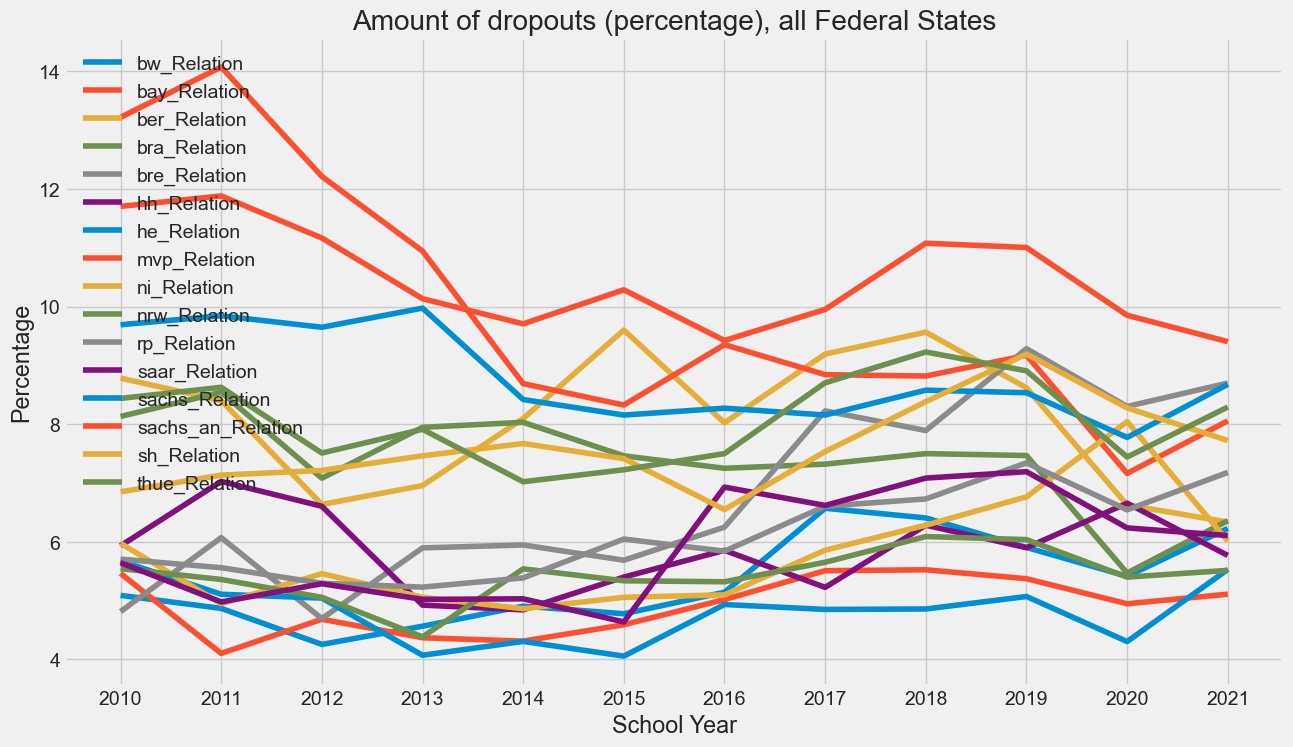

In [ ]:
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

plt.plot(df_dropouts_relativ_merged)

plt.title("Amount of dropouts (percentage), all Federal States")
plt.legend(df_dropouts_relativ_merged)
plt.xlabel("School Year")
plt.ylabel('Percentage')
plt.tick_params(axis='x', rotation=0)
plt.show()

Insight:

- Sachsen-Anhalt has the highest percentage of dropouts compared to their ovarall number of students (at least from 2017-2021): 9,4 %
- followed by Bremen and Sachsen: 8,6 %

# Dropout rates classified by gender

# 1. Dropouts male

In [ ]:
df_male = df[['Bundesland', 'Schulabschluss', '09_10_m',
       '10_11_m', '11_12_m',
       '12_13_m', '13_14_m',
       '14_15_m', '15_16_m',
       '16_17_m', '17_18_m',
       '18_19_m', '19_20_m',
       '20_21_m']]

In [ ]:
df_male = df[['Bundesland', 'Schulabschluss', '09_10_m',
       '10_11_m', '11_12_m',
       '12_13_m', '13_14_m',
       '14_15_m', '15_16_m',
       '16_17_m', '17_18_m',
       '18_19_m', '19_20_m',
       '20_21_m']]

In [ ]:
df_male.rename(columns={'09_10_m': '2010','10_11_m': '2011', '11_12_m': '2012'
                             ,'12_13_m': '2013','13_14_m': '2014', '14_15_m': '2015'
                             ,'15_16_m': '2016','16_17_m': '2017', '17_18_m': '2018'
                             ,'18_19_m': '2019','19_20_m': '2020', '20_21_m':'2021'}, inplace=True)

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1033/554552670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male.rename(columns={'09_10_m': '2010','10_11_m': '2011', '11_12_m': '2012'


In [ ]:
df_male.head(14)

,Bundesland,Schulabschluss,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Baden-Württemberg,Ohne Hauptschulabschluss,3798,3532,3575,3272,3539,3593,3712,4626,4289,3935,3484,3860
1,Baden-Württemberg,Hauptschulabschluss,18043,17413,13295,13762,13031,12936,12668,10329,10511,10401,10433,9812
2,Baden-Württemberg,Mittlerer Schulabschluss,25136,24660,25364,29180,29439,29340,29055,27725,26594,26049,26254,24771
3,Baden-Württemberg,Fachhochschulreife,164,136,180,160,135,147,169,176,152,184,196,194
4,Baden-Württemberg,Allgemeine Hochschulreife,15258,15835,27498,15795,15324,16348,15935,15870,15315,14405,13414,12939
5,Baden-Württemberg,Insgesamt,62399,61576,69912,62169,61468,62364,61539,58726,56861,54974,53781,51576
6,Bayern,Ohne Hauptschulabschluss,4700,4314,3979,3681,3586,4052,4607,4935,4799,4450,3690,3914
7,Bayern,Hauptschulabschluss,20583,20068,20181,18258,17925,17480,17127,16110,17045,16000,14617,13726
8,Bayern,Mittlerer Schulabschluss,28749,29078,29302,30329,30754,30590,32191,31337,30131,29189,27884,28059
9,Bayern,Fachhochschulreife,15,6,9,3,3,5,3,0,0,0,0,0


In [ ]:
# Dropouts male nach BL

bw_male_dropouts = df_male.iloc[0,2:14]
bay_male_dropouts = df_male.iloc[6, 2:14]
ber_male_dropouts = df_male.iloc[12, 2:14]
bra_male_dropouts = df_male.iloc[18, 2:14]
bre_male_dropouts = df_male.iloc[24, 2:14]
hh_male_dropouts = df_male.iloc[30, 2:14]
he_male_dropouts = df_male.iloc[36, 2:14]
mvp_male_dropouts = df_male.iloc[42, 2:14]
ni_male_dropouts = df_male.iloc[48, 2:14]
nrw_male_dropouts = df_male.iloc[54, 2:14]
rp_male_dropouts = df_male.iloc[60, 2:14]
saar_male_dropouts = df_male.iloc[66, 2:14]
sachs_male_dropouts = df_male.iloc[72, 2:14]
sachs_an_male_dropouts = df_male.iloc[78, 2:14]
sh_male_dropouts = df_male.iloc[84, 2:14]
thue_male_dropouts = df_male.iloc[90, 2:14]

### Für Gesamt-Deutschland

In [ ]:
# Concatenate all 16 dataframes

df_male_dropouts_merged = pd.concat([bw_male_dropouts,bay_male_dropouts,ber_male_dropouts,bra_male_dropouts,bre_male_dropouts,hh_male_dropouts,he_male_dropouts,mvp_male_dropouts,ni_male_dropouts,nrw_male_dropouts,rp_male_dropouts,saar_male_dropouts,sachs_male_dropouts,sachs_an_male_dropouts,sh_male_dropouts,thue_male_dropouts],axis=1)
df_male_dropouts_merged.head()

,0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90
2010,3798,4700,1611,1039,229,708,2356,878,3287,7141,1629,343,1412,1101,1348,771
2011,3532,4314,1462,862,294,591,1980,820,3090,6619,1501,299,1396,1063,1349,702
2012,3575,3979,1300,925,245,580,2027,783,2899,6294,1448,327,1362,1016,1296,675
2013,3272,3681,1209,886,265,395,1792,726,2656,6633,1494,295,1567,894,1335,729
2014,3539,3586,1398,908,266,461,1853,598,2532,6925,1466,297,1437,946,1422,714


In [ ]:
# calculate new columns with sum

df_male_dropouts_merged['BRD'] = df_male_dropouts_merged[0] + df_male_dropouts_merged[6] + df_male_dropouts_merged[12] + df_male_dropouts_merged[18] + df_male_dropouts_merged[24] + df_male_dropouts_merged[30] + df_male_dropouts_merged[36] + df_male_dropouts_merged[42] + df_male_dropouts_merged[48] + df_male_dropouts_merged[54] + df_male_dropouts_merged[60] + df_male_dropouts_merged[66] + df_male_dropouts_merged[72] + df_male_dropouts_merged[78] + df_male_dropouts_merged[84] + df_male_dropouts_merged[90]
df_male_dropouts_merged.head(14)

,0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90,BRD
2010,3798,4700,1611,1039,229,708,2356,878,3287,7141,1629,343,1412,1101,1348,771,32351
2011,3532,4314,1462,862,294,591,1980,820,3090,6619,1501,299,1396,1063,1349,702,29874
2012,3575,3979,1300,925,245,580,2027,783,2899,6294,1448,327,1362,1016,1296,675,28731
2013,3272,3681,1209,886,265,395,1792,726,2656,6633,1494,295,1567,894,1335,729,27829
2014,3539,3586,1398,908,266,461,1853,598,2532,6925,1466,297,1437,946,1422,714,28348
2015,3593,4052,1812,961,268,523,1589,643,2662,6462,1642,281,1412,1073,1371,743,29087
2016,3712,4607,1493,965,246,591,1947,735,2676,6453,1607,434,1570,1078,1484,846,30444
2017,4626,4935,1721,1010,349,512,1870,726,3042,6781,1716,399,1579,1102,1464,1021,32853
2018,4289,4799,1780,1020,336,656,1879,802,3209,7102,1811,426,1660,1257,1504,1043,33573
2019,3935,4450,1621,996,358,606,1902,773,3413,7023,1951,423,1674,1308,1678,1066,33177


In [ ]:
# Reducing dataframe to BRD-only

df_male_dropouts_brd = df_male_dropouts_merged['BRD']
#df_male_dropouts_brd.head()

## Visualization BRD male

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1033/688389334.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


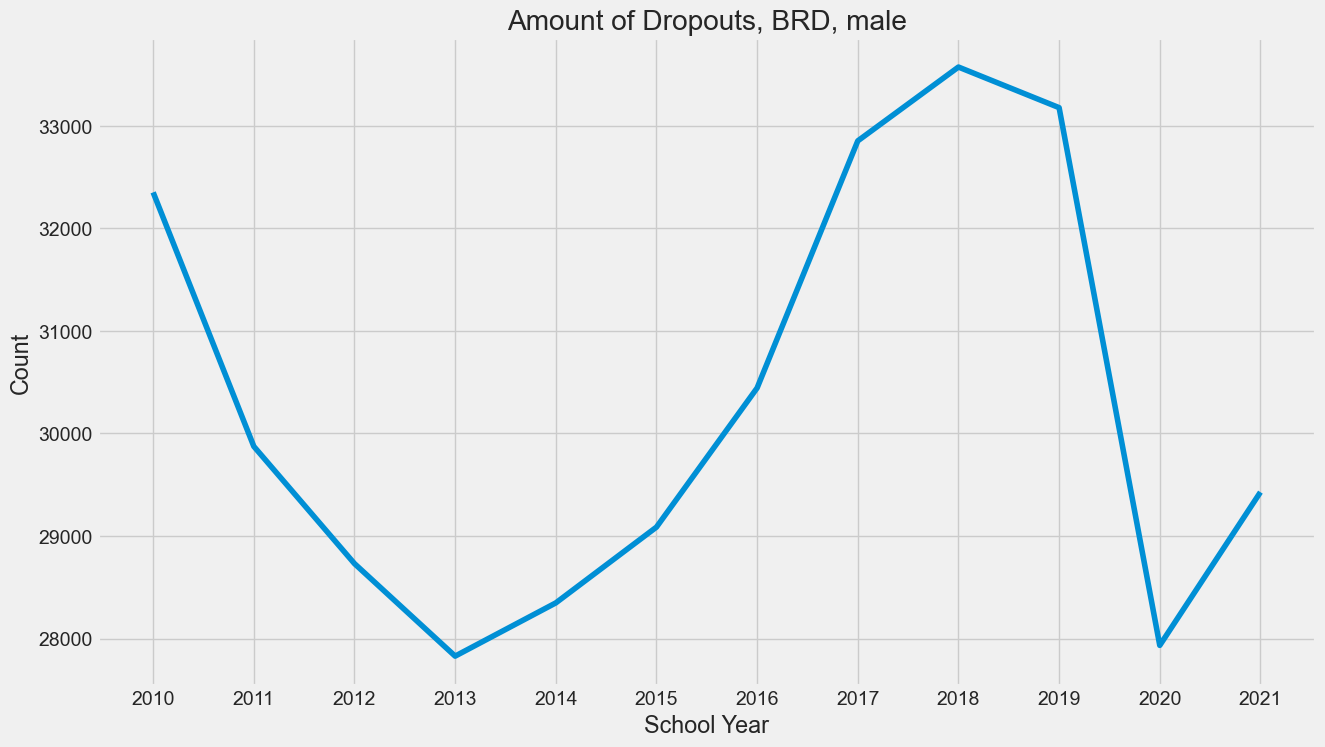

In [ ]:
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

plt.plot(df_male_dropouts_brd)

plt.title("Amount of Dropouts, BRD, male")
plt.xlabel("School Year")
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=0)
plt.show()

# 2. Dropouts female

In [ ]:
df_female = df[['Bundesland', 'Schulabschluss', '09_10_w',
       '10_11_w', '11_12_w',
       '12_13_w', '13_14_w',
       '14_15_w', '15_16_w',
       '16_17_w', '17_18_w',
       '18_19_w', '19_20_w',
       '20_21_w']]

In [ ]:
df_female = df[['Bundesland', 'Schulabschluss', '09_10_w',
       '10_11_w', '11_12_w',
       '12_13_w', '13_14_w',
       '14_15_w', '15_16_w',
       '16_17_w', '17_18_w',
       '18_19_w', '19_20_w',
       '20_21_w']]

In [ ]:
df_female.rename(columns={'09_10_w': '2010','10_11_w': '2011', '11_12_w': '2012'
                             ,'12_13_w': '2013','13_14_w': '2014', '14_15_w': '2015'
                             ,'15_16_w': '2016','16_17_w': '2017', '17_18_w': '2018'
                             ,'18_19_w': '2019','19_20_w': '2020', '20_21_w':'2021'}, inplace=True)

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1033/2826883480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female.rename(columns={'09_10_w': '2010','10_11_w': '2011', '11_12_w': '2012'


In [ ]:
# Dropouts male nach BL

bw_female_dropouts = df_female.iloc[0,2:14]
bay_female_dropouts = df_female.iloc[6, 2:14]
ber_female_dropouts = df_female.iloc[12, 2:14]
bra_female_dropouts = df_female.iloc[18, 2:14]
bre_female_dropouts = df_female.iloc[24, 2:14]
hh_female_dropouts = df_female.iloc[30, 2:14]
he_female_dropouts = df_female.iloc[36, 2:14]
mvp_female_dropouts = df_female.iloc[42, 2:14]
ni_female_dropouts = df_female.iloc[48, 2:14]
nrw_female_dropouts = df_female.iloc[54, 2:14]
rp_female_dropouts = df_female.iloc[60, 2:14]
saar_female_dropouts = df_female.iloc[66, 2:14]
sachs_female_dropouts = df_female.iloc[72, 2:14]
sachs_an_female_dropouts = df_female.iloc[78, 2:14]
sh_female_dropouts = df_female.iloc[84, 2:14]
thue_female_dropouts = df_female.iloc[90, 2:14]

### Für Gesamt-Deutschland

In [ ]:
# Concatenate all 16 dataframes

df_female_dropouts_merged = pd.concat([bw_female_dropouts,bay_female_dropouts,ber_female_dropouts,bra_female_dropouts,bre_female_dropouts,hh_female_dropouts,he_female_dropouts,mvp_female_dropouts,ni_female_dropouts,nrw_female_dropouts,rp_female_dropouts,saar_female_dropouts,sachs_female_dropouts,sachs_an_female_dropouts,sh_female_dropouts,thue_female_dropouts],axis=1)
df_female_dropouts_merged.head()

,0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90
2010,2447,2879,1119,590,141,516,1507,556,1931,4841,936,223,929,743,854,495
2011,2390,2669,1025,549,188,429,1390,525,1995,4583,968,188,863,675,794,455
2012,2376,2480,1039,514,167,413,1324,483,1874,4397,905,200,926,652,818,349
2013,2245,2311,906,546,184,302,1237,429,1716,4557,852,214,1032,585,902,448
2014,2329,2306,1032,554,182,294,1178,363,1713,4770,891,192,911,582,901,404


In [ ]:
# calculate new columns with sum

df_female_dropouts_merged['BRD'] = df_female_dropouts_merged[0] + df_female_dropouts_merged[6] + df_female_dropouts_merged[12] + df_female_dropouts_merged[18] + df_female_dropouts_merged[24] + df_female_dropouts_merged[30] + df_female_dropouts_merged[36] + df_female_dropouts_merged[42] + df_female_dropouts_merged[48] + df_female_dropouts_merged[54] + df_female_dropouts_merged[60] + df_female_dropouts_merged[66] + df_female_dropouts_merged[72] + df_female_dropouts_merged[78] + df_female_dropouts_merged[84] + df_female_dropouts_merged[90]
df_female_dropouts_merged.head(14)

,0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90,BRD
2010,2447,2879,1119,590,141,516,1507,556,1931,4841,936,223,929,743,854,495,20707
2011,2390,2669,1025,549,188,429,1390,525,1995,4583,968,188,863,675,794,455,19686
2012,2376,2480,1039,514,167,413,1324,483,1874,4397,905,200,926,652,818,349,18917
2013,2245,2311,906,546,184,302,1237,429,1716,4557,852,214,1032,585,902,448,18466
2014,2329,2306,1032,554,182,294,1178,363,1713,4770,891,192,911,582,901,404,18602
2015,2175,2207,1197,595,179,374,953,357,1677,4592,964,157,942,662,863,454,18348
2016,2413,2426,997,558,191,401,1270,440,1615,4352,918,228,963,585,952,440,18749
2017,2813,2561,1262,554,226,384,1223,407,1788,4368,1069,211,987,647,829,498,19827
2018,2662,2615,1175,608,228,428,1132,392,1884,4420,1000,230,977,747,949,577,20024
2019,2346,2524,1078,583,249,372,1142,452,2011,4398,1007,214,1034,687,995,561,19653


In [ ]:
# Reducing dataframe to BRD-only

df_female_dropouts_brd = df_female_dropouts_merged['BRD']

## Visualization BRD female

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1033/165351742.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


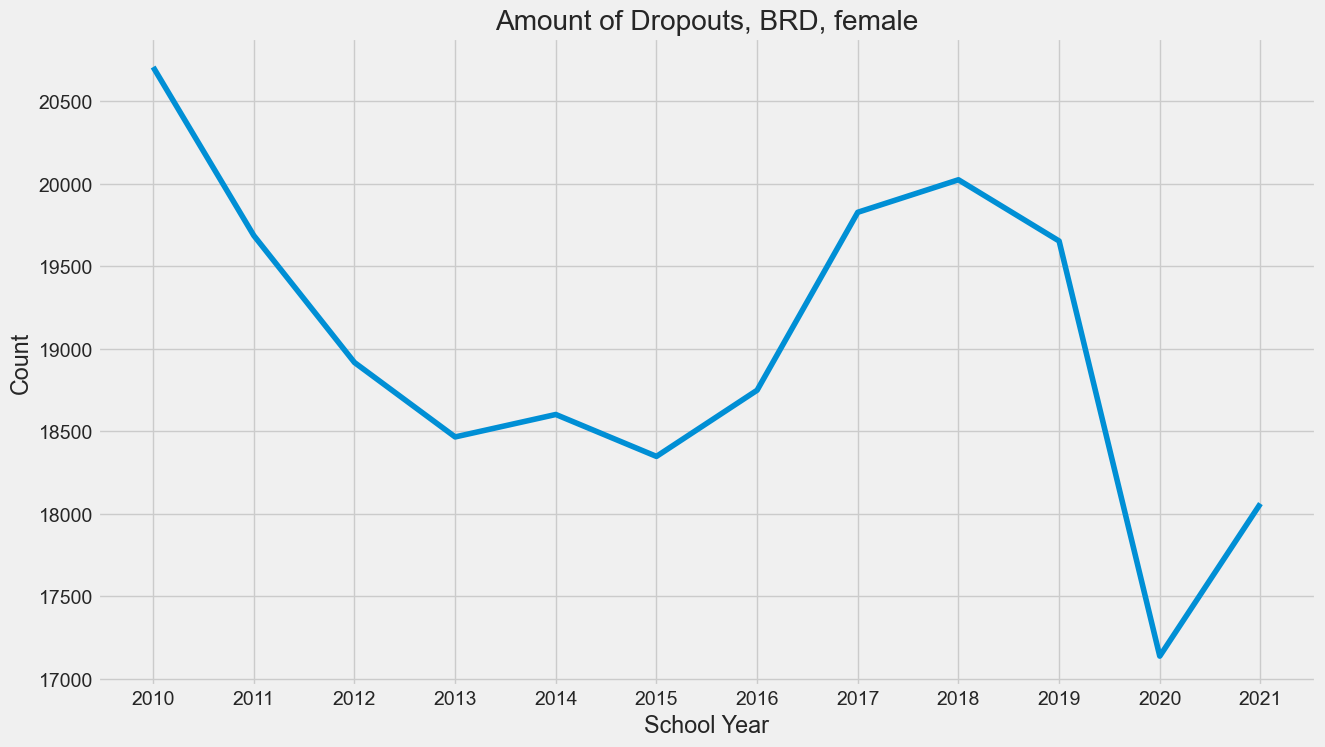

In [ ]:
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

plt.plot(df_female_dropouts_brd)

plt.title("Amount of Dropouts, BRD, female")
plt.xlabel("School Year")
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=0)
plt.show()

## Visualization alle zusammen

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1033/786776724.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


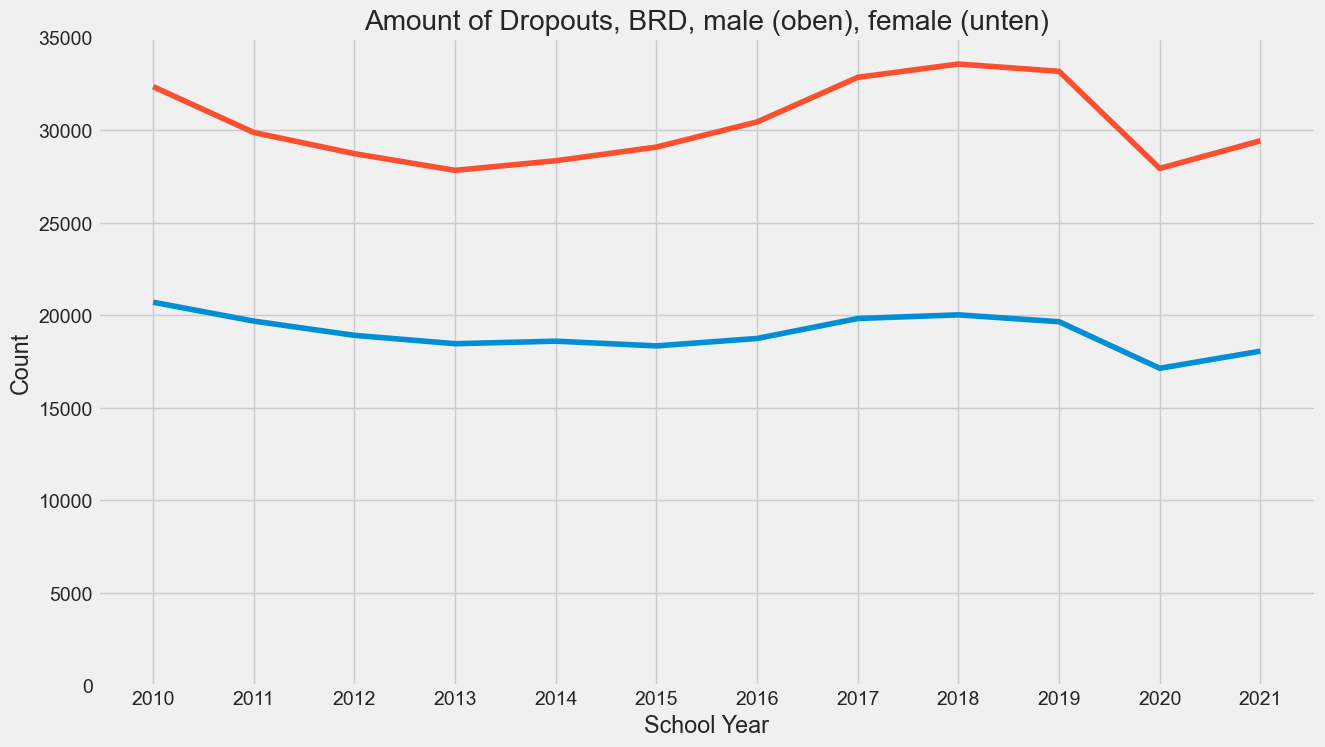

In [ ]:
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

plt.plot(df_female_dropouts_brd)
plt.plot(df_male_dropouts_brd)
#plt.plot(df_dropouts_brd)

plt.title("Amount of Dropouts, BRD, male (oben), female (unten)")
plt.xlabel("School Year")
plt.ylabel('Count')
plt.ylim(0, 35000)

plt.tick_params(axis='x', rotation=0)
plt.show()

Insight:
- dropout values for males are consistently above the values for females. The shape of the graph is similar, particularly the decrease from 2019 to 2020 and the increasement to 2021. 

Next Step? How big are the values within the males/females?

## Male gesamt

In [ ]:
bw_male_gesamt = df_male.iloc[5,2:14]
bay_male_gesamt = df_male.iloc[11, 2:14]
ber_male_gesamt = df_male.iloc[17, 2:14]
bra_male_gesamt = df_male.iloc[23, 2:14]
bre_male_gesamt = df_male.iloc[29, 2:14]
hh_male_gesamt = df_male.iloc[35, 2:14]
he_male_gesamt = df_male.iloc[41, 2:14]
mvp_male_gesamt = df_male.iloc[47, 2:14]
ni_male_gesamt = df_male.iloc[53, 2:14]
nrw_male_gesamt = df_male.iloc[59, 2:14]
rp_male_gesamt = df_male.iloc[65, 2:14]
saar_male_gesamt = df_male.iloc[71, 2:14]
sachs_male_gesamt = df_male.iloc[77, 2:14]
sachs_an_male_gesamt = df_male.iloc[83, 2:14]
sh_male_gesamt = df_male.iloc[89, 2:14]
thue_male_gesamt = df_male.iloc[95, 2:14]

In [ ]:
bw_male_gesamt.head(14)

2010    62399
2011    61576
2012    69912
2013    62169
2014    61468
2015    62364
2016    61539
2017    58726
2018    56861
2019    54974
2020    53781
2021    51576
Name: 5, dtype: object

## Femal gesamt

In [ ]:
bw_female_gesamt = df_female.iloc[5,2:14]
bay_female_gesamt = df_female.iloc[11, 2:14]
ber_female_gesamt = df_female.iloc[17, 2:14]
bra_female_gesamt = df_female.iloc[23, 2:14]
bre_female_gesamt = df_female.iloc[29, 2:14]
hh_female_gesamt = df_female.iloc[35, 2:14]
he_female_gesamt = df_female.iloc[41, 2:14]
mvp_female_gesamt = df_female.iloc[47, 2:14]
ni_female_gesamt = df_female.iloc[53, 2:14]
nrw_female_gesamt = df_female.iloc[59, 2:14]
rp_female_gesamt = df_female.iloc[65, 2:14]
saar_female_gesamt = df_female.iloc[71, 2:14]
sachs_female_gesamt = df_female.iloc[77, 2:14]
sachs_an_female_gesamt = df_female.iloc[83, 2:14]
sh_female_gesamt = df_female.iloc[89, 2:14]
thue_female_gesamt = df_female.iloc[95, 2:14]

## Wie hoch ist die dropout rate unter den (allen) Jungs?

In [ ]:
# dataframe with columns for all 16 federal states with male pupils for all years

brd_male_gesamt = pd.concat([bw_male_gesamt,bay_male_gesamt,ber_male_gesamt,bra_male_gesamt,bre_male_gesamt,hh_male_gesamt,he_male_gesamt,mvp_male_gesamt,ni_male_gesamt,nrw_male_gesamt,rp_male_gesamt,saar_male_gesamt,sachs_male_gesamt,sachs_an_male_gesamt,sh_male_gesamt,thue_male_gesamt],axis=1)


In [ ]:
brd_male_gesamt['BRD_total_males'] = brd_male_gesamt[5] + brd_male_gesamt[11] + brd_male_gesamt[17] + brd_male_gesamt[23] + brd_male_gesamt[29] + brd_male_gesamt[35] + brd_male_gesamt[41] + brd_male_gesamt[47] + brd_male_gesamt[53] + brd_male_gesamt[59] + brd_male_gesamt[65] + brd_male_gesamt[71] + brd_male_gesamt[77] + brd_male_gesamt[83] + brd_male_gesamt[89] + brd_male_gesamt[95]


In [ ]:
# reduce columns
brd_male_gesamt_brd_only = brd_male_gesamt['BRD_total_males']

In [ ]:
# merge with male dropouts
male_dropouts_relativ = pd.concat([df_male_dropouts_brd, brd_male_gesamt_brd_only], axis=1)  

In [ ]:
# new column with percentage
male_dropouts_relativ['percentage'] = male_dropouts_relativ['BRD'] / male_dropouts_relativ['BRD_total_males'] * 100
male_dropouts_relativ.head(13)

,BRD,BRD_total_males,percentage
2010,32351,438204,7.382635
2011,29874,445008,6.713138
2012,28731,439463,6.537752
2013,27829,452410,6.151279
2014,28348,433207,6.543754
2015,29087,432245,6.729285
2016,30444,437367,6.960745
2017,32853,428564,7.665833
2018,33573,420072,7.992201
2019,33177,411766,8.057246


## save to csv and rename columns

In [ ]:
male_dropouts_relativ.rename(columns={'BRD': 'dropouts_m', 'percentage': 'dropout_rate'}, inplace=True)
male_dropouts_relativ.head(13)

,dropouts_m,BRD_total_males,dropout_rate
2010,32351,438204,7.382635
2011,29874,445008,6.713138
2012,28731,439463,6.537752
2013,27829,452410,6.151279
2014,28348,433207,6.543754
2015,29087,432245,6.729285
2016,30444,437367,6.960745
2017,32853,428564,7.665833
2018,33573,420072,7.992201
2019,33177,411766,8.057246


In [ ]:
# male_dropouts_relativ.to_csv('./Tableau/dropouts_male.csv', index=True)

In [ ]:
male_dropouts_relativ_only = male_dropouts_relativ['percentage']

## Wie hoch ist die dropout rate unter den (allen) Females?

In [ ]:
# dataframe with columns for all 16 federal states with female pupils for all years 

brd_female_gesamt = pd.concat([bw_female_gesamt,bay_female_gesamt,ber_female_gesamt,bra_female_gesamt,bre_female_gesamt,hh_female_gesamt,he_female_gesamt,mvp_female_gesamt,ni_female_gesamt,nrw_female_gesamt,rp_female_gesamt,saar_female_gesamt,sachs_female_gesamt,sachs_an_female_gesamt,sh_female_gesamt,thue_female_gesamt],axis=1)


In [ ]:
brd_female_gesamt['BRD_total_females'] = brd_female_gesamt[5] + brd_female_gesamt[11] + brd_female_gesamt[17] + brd_female_gesamt[23] + brd_female_gesamt[29] + brd_female_gesamt[35] + brd_female_gesamt[41] + brd_female_gesamt[47] + brd_female_gesamt[53] + brd_female_gesamt[59] + brd_female_gesamt[65] + brd_female_gesamt[71] + brd_female_gesamt[77] + brd_female_gesamt[83] + brd_female_gesamt[89] + brd_female_gesamt[95]


In [ ]:
# reduce columns
brd_female_gesamt_brd_only = brd_female_gesamt['BRD_total_females']

In [ ]:
# merge with female dropouts
female_dropouts_relativ = pd.concat([df_female_dropouts_brd, brd_female_gesamt_brd_only], axis=1)  

In [ ]:
# new column with percentage
female_dropouts_relativ['percentage'] = female_dropouts_relativ['BRD'] / female_dropouts_relativ['BRD_total_females'] * 100
female_dropouts_relativ.head(13)

,BRD,BRD_total_females,percentage
2010,20707,427112,4.848143
2011,19686,437905,4.495496
2012,18917,429327,4.406199
2013,18466,442924,4.169113
2014,18602,417514,4.455419
2015,18348,414067,4.431167
2016,18749,418244,4.48279
2017,19827,403243,4.916886
2018,20024,392096,5.106913
2019,19653,389047,5.051575


In [ ]:
# Für Kamil

female_dropouts_relativ.rename(columns={'BRD': 'dropouts_w', 'percentage': 'dropout_rate'}, inplace=True)
female_dropouts_relativ.head(13)

,dropouts_w,BRD_total_females,dropout_rate
2010,20707,427112,4.848143
2011,19686,437905,4.495496
2012,18917,429327,4.406199
2013,18466,442924,4.169113
2014,18602,417514,4.455419
2015,18348,414067,4.431167
2016,18749,418244,4.48279
2017,19827,403243,4.916886
2018,20024,392096,5.106913
2019,19653,389047,5.051575


In [ ]:
# female_dropouts_relativ.to_csv('./Tableau/dropouts_female.csv', index=True)

In [ ]:
female_dropouts_relativ_only = female_dropouts_relativ['percentage']

## Visualization

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1033/1643426331.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


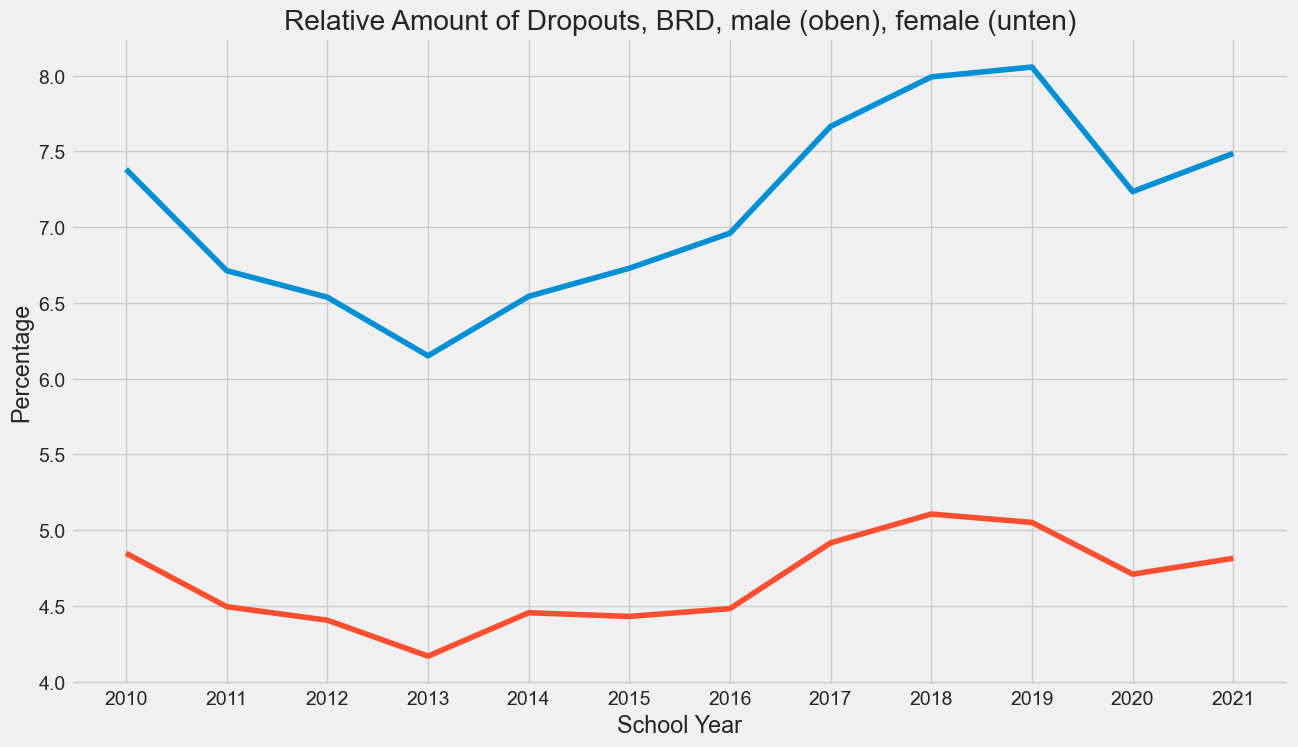

In [ ]:
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

plt.plot(male_dropouts_relativ_only)
plt.plot(female_dropouts_relativ_only)

plt.title("Relative Amount of Dropouts, BRD, male (oben), female (unten)")
plt.xlabel("School Year")
plt.ylabel('Percentage')
#plt.ylim(0, 35000)

plt.tick_params(axis='x', rotation=0)
plt.show()

Insight:
- also the relative values of the dropouts are higher in the group of males than in the group of females.